In [1]:
#imports
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import matplotlib
matplotlib.use('nbagg')
import numpy as np
import scipy as sp
from scipy import sparse
import matplotlib.pyplot as plt
#from scipy import special
from random import gauss
#import hdf5storage
import h5py
import timeit
from numba import jit
#from sympy.solvers.solveset import nonlinsolve
#from sympy.core.symbol import symbols
#from sympy import exp
from scipy import stats
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from core.analysis import *
from core.simulation import *


<IPython.core.display.Javascript object>

In [3]:
#this function reconstruct some necessary fiber properties from the 'Fibers' and saves them to file
#note that the function is set to utilize the data in 'fgCC', following selen's instruction
#however, another fiber dataset is present inside 'Fibers', called 'fg'.
#the other dataset can be selected manually from inside the function
construct_fibers_from_data(
                #data from Selen Atasoy
                filepath_data='G:/Macbook Stuff/Downloads/NeuralFieldModelv2/100307_Laplace.mat',
                filepath_Fibers='G:/Macbook Stuff/Downloads/Fibers.mat',
                           
                savefiles=True,
                bundle_size=7,
                output_filepath_fiber_edges='G:/Macbook Stuff/Downloads/NeuralFieldModelv2/fg_fiber_bundles.npy',
                output_filepath_fiber_lengths='G:/Macbook Stuff/Downloads/NeuralFieldModelv2/fg_fiber_lengths.npy',                       
                output_filepath_fiber_dist_starts='G:/Macbook Stuff/Downloads/NeuralFieldModelv2/fg_fiber_dist_starts.npy',
                output_filepath_fiber_dist_ends='G:/Macbook Stuff/Downloads/NeuralFieldModelv2/fg_fiber_dist_ends.npy',
                output_filepath_fiber_ends='G:/Macbook Stuff/Downloads/NeuralFieldModelv2/fg_fiber_ends.npy')    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977


8417
8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616


10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
1021

11413
11414
11415
11416
11417
11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
1157

12779
12780
12781
12782
12783
12784
12785
12786
12787
12788
12789
12790
12791
12792
12793
12794
12795
12796
12797
12798
12799
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
1294

14145
14146
14147
14148
14149
14150
14151
14152
14153
14154
14155
14156
14157
14158
14159
14160
14161
14162
14163
14164
14165
14166
14167
14168
14169
14170
14171
14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
1431

15511
15512
15513
15514
15515
15516
15517
15518
15519
15520
15521
15522
15523
15524
15525
15526
15527
15528
15529
15530
15531
15532
15533
15534
15535
15536
15537
15538
15539
15540
15541
15542
15543
15544
15545
15546
15547
15548
15549
15550
15551
15552
15553
15554
15555
15556
15557
15558
15559
15560
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
1567

16877
16878
16879
16880
16881
16882
16883
16884
16885
16886
16887
16888
16889
16890
16891
16892
16893
16894
16895
16896
16897
16898
16899
16900
16901
16902
16903
16904
16905
16906
16907
16908
16909
16910
16911
16912
16913
16914
16915
16916
16917
16918
16919
16920
16921
16922
16923
16924
16925
16926
16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
1704

<IPython.core.display.Javascript object>


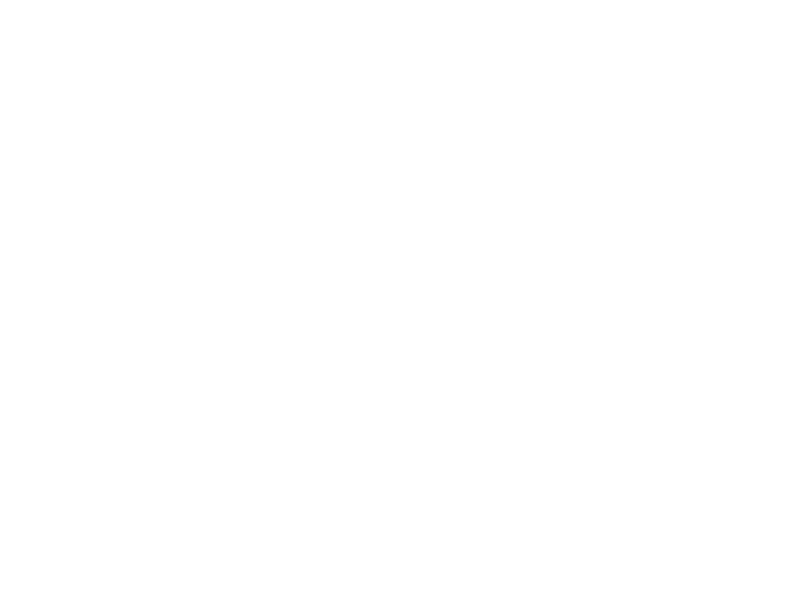

Constructing mesh adjacency matrix...
Now adding DTI fibers from G:/Macbook Stuff/Downloads/NeuralFieldModelv2/fgCC_fiber_edges.npy...


In [40]:
#this function reconstruct the mesh + DTI adjacency directly from the 'faces' and 'fibers' datasets
#the subcortical nodes and edges are excluded at the end of the procedure
#if the 'visual' option is selected, the function also returns datasets in suitable format for plotly
mesh_DTI_adjacency, Xn, Yn, Zn, iN, jN, kN,  Xe, Ye, Ze = construct_adjacency_matrix_from_data(
                                #data from Selen Atasoy
                                filepath_data='G:/Macbook Stuff/Downloads/NeuralFieldModelv2/100307_Laplace.mat',
                                
                                #results of previous cell
                                filepath_fiber_edges=['G:/Macbook Stuff/Downloads/NeuralFieldModelv2/fgCC_fiber_edges.npy'],#,'G:/Macbook Stuff/Downloads/NeuralFieldModelv2/fg_fiber_edges.npy'],
                                filepath_fiber_lengths=['G:/Macbook Stuff/Downloads/NeuralFieldModelv2/fgCC_fiber_lengths.npy'],#,'G:/Macbook Stuff/Downloads/NeuralFieldModelv2/fg_fiber_lengths.npy'],
                                filepath_fiber_ends=['G:/Macbook Stuff/Downloads/NeuralFieldModelv2/fgCC_fiber_ends.npy'],#,'G:/Macbook Stuff/Downloads/NeuralFieldModelv2/fg_fiber_ends.npy'],
                                
                                include_subcortex=False,
                                add_DTI=True,
                                fiber_speed_factor=200,
    
                                threshold=False,
                                max_dist=10,
                                filepath_fiber_dist_starts=['G:/Macbook Stuff/Downloads/NeuralFieldModelv2/fgCC_fiber_dist_starts.npy'],#,'G:/Macbook Stuff/Downloads/NeuralFieldModelv2/fg_fiber_dist_starts.npy'],
                                filepath_fiber_dist_ends=['G:/Macbook Stuff/Downloads/NeuralFieldModelv2/fgCC_fiber_dist_ends.npy'],#,'G:/Macbook Stuff/Downloads/NeuralFieldModelv2/fg_fiber_dist_ends.npy'],

                                visual=True,
                                plot_subcortex=False,
                                plot_DTI_edges=False)

In [28]:
#len(np.nonzero(mesh_DTI_adjacency.toarray())[0])/2
#np.shape(mesh_DTI_adjacency.toarray())
f = h5py.File('G:/Macbook Stuff/Downloads/NeuralFieldModelv2/100307_Laplace.mat', 'r')
CC = np.asarray(f['CC']['restInds'], dtype=int)
indices = np.array([elem[0] for elem in CC])-1
AllVet=np.asarray(f['vertices']['all'])

u_0=np.heaviside(AllVet[0,indices],0)

#no_sub=mesh_DTI_adjacency[indices,:]
#no_sub=no_sub[:,indices]
#len(np.nonzero(no_sub.toarray())[0])/2
#mesh_DTI_adjacency=np.load('G:/Macbook Stuff/Downloads/NeuralFieldModelv2/metric_cortical_DTI_bundles_full_all_fibers.npy')
#mesh_DTI_adjacency=mesh_DTI_adjacency[indices,:]
#mesh_DTI_adjacency=mesh_DTI_adjacency[:,indices]
#mesh_DTI_adjacency.toarray().shape

In [7]:
#np.save('G:/Macbook Stuff/Downloads/NeuralFieldModelv2/metric_cortical_DTI_bundles_full_all_fibers.npy', mesh_DTI_adjacency)

In [41]:
#construct graph Laplacian and diagonalize it
#this is the same procedure used for regular graphs
AdjMatrix=mesh_DTI_adjacency.toarray()
Deg=np.sum(AdjMatrix, axis=0)
Degree_Matrix=sp.sparse.diags(Deg)
regLap = Degree_Matrix - sp.sparse.csc_matrix(AdjMatrix)
Laplacian=-regLap.toarray()

vecs=True

if vecs==False:    
    eigenvalues=np.linalg.eigvalsh(Laplacian)
    eigenvalues[-1]=0
    eigenvalues=eigenvalues[::-1]
    np.save('G:/Macbook Stuff/Downloads/NeuralFieldModelv2/eigvals_DTI_full_200short.npy', eigenvalues)
else:
    eigenvalues,eigenvectors=np.linalg.eigh(Laplacian)
    eigenvalues[-1]=0
    #note that the eigenvectors come out 2-normalized
    eigenvalues=eigenvalues[::-1]
    eigenvectors=eigenvectors[:,::-1]
    np.save('G:/Macbook Stuff/Downloads/NeuralFieldModelv2/eigvals_DTI_fgCC_200short.npy', eigenvalues)
    np.save('G:/Macbook Stuff/Downloads/NeuralFieldModelv2/eigvecs_DTI_fgCC_200short.npy', eigenvectors)


In [42]:
#Alternatively, if previously known, read eigenvalues and eigenvectors from file
#this is what i used for the thesis. note that it has to be loaded with a minus sign
#eigenvalues_thesis = -np.load('E:/My Documents/Dropbox/Amsterdam Math/Rikkert Hindriks/Graph-Stochastic-Wilson-Cowan-Model/data/eigvals.npy')
#this should be the corresponding eigenvectors. they appear to be 1-normalized
#eigenvectors_thesis = -np.load('G:/Macbook Stuff/Downloads/NeuralFieldModelv2/eigvecs.npy')


eigenvalues = np.load('G:/Macbook Stuff/Downloads/NeuralFieldModelv2/eigvals_DTI_fgCC_200short.npy')
#eigenvectors = np.load('G:/Macbook Stuff/Downloads/NeuralFieldModelv2/eigvecs_DTI_fgCC_200short.npy')
#eigenvalues = -np.load('E:/My Documents/Dropbox/Amsterdam Math/Rikkert Hindriks/Graph-Stochastic-Wilson-Cowan-Model/data/eigvals.npy')


print(eigenvalues)
#print(eigenvalues2)

[ 0.00000000e+00 -1.31066194e-03 -1.72125914e-03 ... -5.90747827e+02
 -5.94251526e+02 -6.64567306e+02]


In [47]:
#Set parameters and bounds for minimization algorithms
aEE, bnds_aEE = 140, (0.01,1000)
aIE, bnds_aIE = 155, (0.01,1000)
aEI, bnds_aEI = 165, (0.01,1000)
aII, bnds_aII = 140, (0.01,1000)
dE, bnds_dE = 2, (0.01,100)
dI, bnds_dI = 2, (0.01,100)
P, bnds_P = 0, (0,100)
Q, bnds_Q = 0, (0,100)
sEE, bnds_sEE = 6, (0,1000)
sIE, bnds_sIE = 10, (0,1000)
sEI, bnds_sEI = 10, (0,1000)
sII, bnds_sII = 50, (0,1000)
D, bnds_D = 1, (0.1,10)             #unchanged
tE, bnds_tE = 1, (0.01,100)          
tI, bnds_tI = 1, (0.01,100)          
#snE, bnds_snE = 1, (1,10)        #unchanged
#snI, bnds_snI = 1, (1,10)         #unchanged


initial_guess=np.array([aEE,aIE,aEI,aII,dE,dI,P,Q,sEE,sIE,sEI,sII,tE,tI])#,snE])#,snI]) 
bnds=[bnds_aEE,bnds_aIE,bnds_aEI,bnds_aII,bnds_dE,bnds_dI,bnds_P,bnds_Q,bnds_sEE,bnds_sIE,bnds_sEI,bnds_sII,bnds_tE,bnds_tI]#,bnds_snE]#,bnds_snI]

Graph_Kernel='Gaussian'
first_k=2
True_Spatial_Spectrum = 15*(np.arange(first_k,5000)**(-0.3))
LSA=True
Visual=False
SaveFiles=False
FilePath=' '


Max_omega=300
Delta_omega=1
freqs=np.arange(0,Max_omega,Delta_omega)/(2*np.pi)

#higher gaussian TPS
higher_gaussian_TPS=100000/(100*freqs+10000)+5*np.exp((-(freqs-10)**2)/(2*0.9**2))
#lower gaussian TPS
lower_gaussian_TPS=100000/(100*freqs+10000)+3*np.exp((-(freqs-10)**2)/(2*1.2**2)) #too complex: 10*(1/(0.1*freqs+0.4)+0.7*np.exp((-(freqs-10)**2)/(2*0.9**2))+0.3*np.exp((-(freqs-22)**2)/(2*3**2)))
#even lower gaussian TPS
even_lower_gaussian_TPS=100000/(100*freqs+10000)+1.5*np.exp((-(freqs-10)**2)/(2*1.8**2))
#lowest gaussian TPS
lowest_gaussian_TPS=100000/(100*freqs+10000)+0.5*np.exp((-(freqs-10)**2)/(2*2.5**2))
#no gaussian TPS
no_gaussian_TPS=100000/(100*freqs+10000)

True_Temporal_Spectrum=no_gaussian_TPS

#change none to True_Spatial_Spectrum if want to fit to both
Args = (eigenvalues, Graph_Kernel, True_Temporal_Spectrum, Max_omega, Delta_omega, True_Spatial_Spectrum, first_k, LSA, Visual, SaveFiles)

<IPython.core.display.Javascript object>


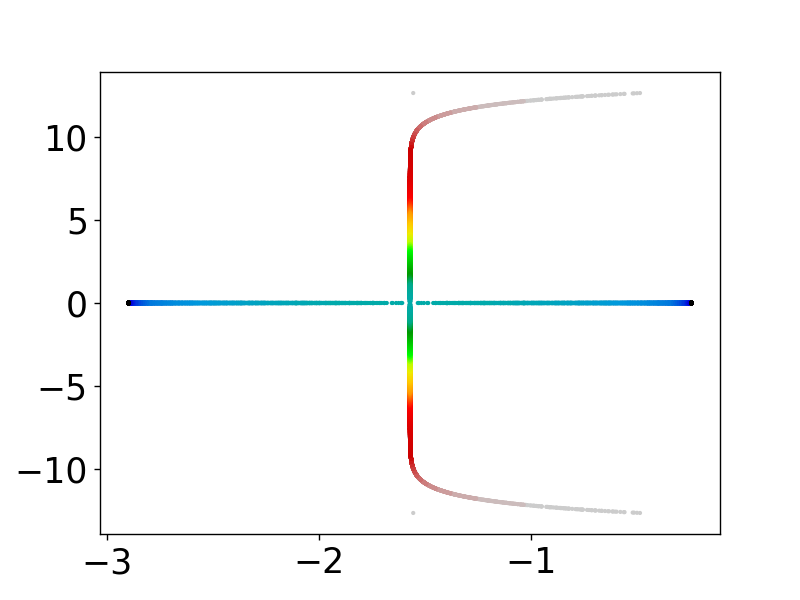

E*=0.0076, I*=0.0461: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0076 Iss=0.0461, Distance: 4.5984, Scale: 149.6876


<IPython.core.display.Javascript object>


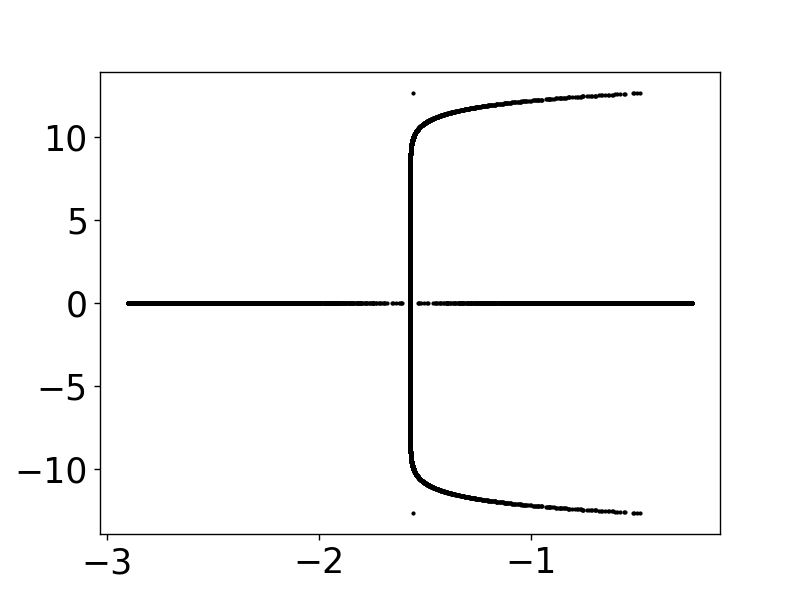

<IPython.core.display.Javascript object>


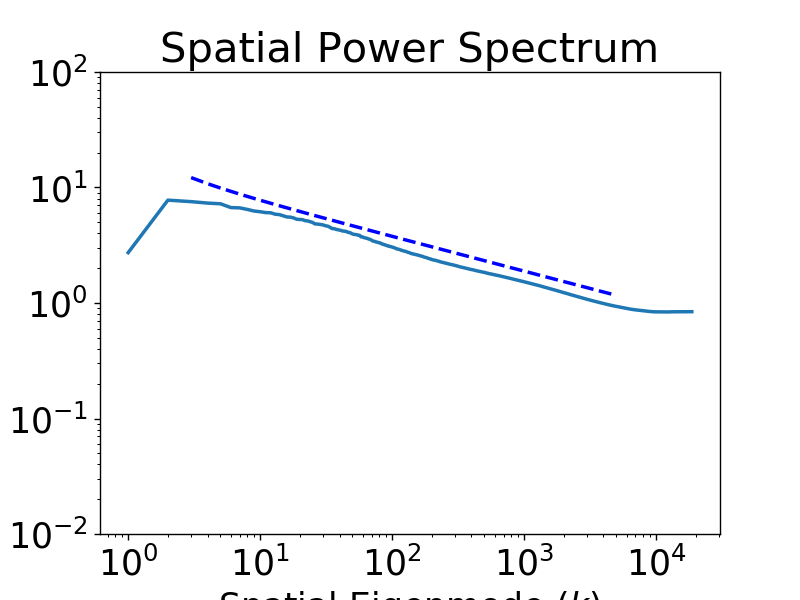

4.598417617347645

In [5]:
############################
#single analysis for easy visualization (note that if there are multiple stedy states the visualization will refer to the best one)
better_result=dict(x=np.array([1.15357519e+02, 1.80816514e+02, 1.89765888e+02, 2.10306805e+02,
       1.43682388e+01, 1.09130331e+00, 5.36635639e+00, 5.31252166e+00,
       8.37626732e+00, 2.74681544e+00, 3.66503548e-02, 1.00910684e+02,
       4.95497870e+00, 4.47579295e+00]))

aEE=115
aIE=175
aEI=190 
aII=210
dE=2.5 
dI=1 
P=0 
Q=0 
sEE=5.5 
sIE=3
sEI=3.5 
sII=100 
tE=1.2
tI=0.8
initial_guess=np.array([aEE,aIE,aEI,aII,dE,dI,P,Q,sEE,sIE,sEI,sII,tE,tI])
Full_Analysis(better_result['x'], eigenvalues, Graph_Kernel, True_Temporal_Spectrum, Max_omega, Delta_omega, True_Spatial_Spectrum, first_k, LSA, Visual, SaveFiles)

In [94]:
############################
#simple attempt at power spectrum fitting with a minimization algorithm. May get stuck in local minima.
#playing around with tolerance and max number of iterations is often necessary, depending on initial conditions. e.g.
#First run with fairly random initial guess: tol=1e-03, no maxiter (will take a while)
#Run starting from a previously obtained result: tol=1e-08, 'maxiter':2000

initial_guess=better_result['x']
result = sp.optimize.minimize(Full_Analysis, initial_guess, args=Args,
                              method='trust-constr', 
                              bounds=bnds), 
                             # tol=1e-05)
                             # options={'maxiter':2000})

E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.5769, scale: 519.4480. Dist temporal: 4.8087, scale: 6.9855
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.5769, scale: 519.4480. Dist temporal: 4.8087, scale: 6.9855
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.5769, scale: 519.4480. Dist temporal: 4.8087, scale: 6.9855
E*=0.0028, I*=0.

Best suitable steady state: 0, with Ess=0.0090 Iss=0.0856, Dist spatial: 17.7661, scale: 326.4566. Dist temporal: 22.0859, scale: 6.6189
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0856, Dist spatial: 17.7661, scale: 326.4566. Dist temporal: 22.0859, scale: 6.6189
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0856, Dist spatial: 17.7718, scale: 326.4308. Dist temporal: 22.0867, scale: 6.6189
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0856, Dist spatial: 17.8170, scale: 326.2154. Dist temporal: 22.0978, scale: 6.6185
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0

Best suitable steady state: 0, with Ess=0.0090 Iss=0.0856, Dist spatial: 18.4226, scale: 330.3708. Dist temporal: 21.8568, scale: 6.6518
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0856, Dist spatial: 18.4133, scale: 330.4142. Dist temporal: 21.8543, scale: 6.6519
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0856, Dist spatial: 18.4226, scale: 330.3708. Dist temporal: 21.8568, scale: 6.6518
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0856, Dist spatial: 18.4226, scale: 330.3708. Dist temporal: 21.8568, scale: 6.6518
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0

Best suitable steady state: 0, with Ess=0.0090 Iss=0.0856, Dist spatial: 18.4416, scale: 330.3152. Dist temporal: 21.8585, scale: 6.6518
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0856, Dist spatial: 18.4498, scale: 330.2770. Dist temporal: 21.8606, scale: 6.6518
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0856, Dist spatial: 18.4498, scale: 330.2771. Dist temporal: 21.8606, scale: 6.6518
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0856, Dist spatial: 18.4498, scale: 330.2771. Dist temporal: 21.8606, scale: 6.6518
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0

Best suitable steady state: 0, with Ess=0.0090 Iss=0.0856, Dist spatial: 18.4152, scale: 330.4455. Dist temporal: 21.8527, scale: 6.6521
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0856, Dist spatial: 18.4021, scale: 330.5085. Dist temporal: 21.8485, scale: 6.6522
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0856, Dist spatial: 18.4150, scale: 330.4463. Dist temporal: 21.8527, scale: 6.6521
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0856, Dist spatial: 18.4665, scale: 330.2094. Dist temporal: 21.8651, scale: 6.6517
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0

Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6140, scale: 519.6804. Dist temporal: 4.7987, scale: 6.9855
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6140, scale: 519.6804. Dist temporal: 4.7987, scale: 6.9855
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6139, scale: 519.6804. Dist temporal: 4.7987, scale: 6.9855
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable st

Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6294, scale: 519.7748. Dist temporal: 4.7958, scale: 6.9856
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6294, scale: 519.7748. Dist temporal: 4.7958, scale: 6.9856
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6294, scale: 519.7749. Dist temporal: 4.7958, scale: 6.9856
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable st

Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6294, scale: 519.7747. Dist temporal: 4.7958, scale: 6.9856
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6294, scale: 519.7747. Dist temporal: 4.7958, scale: 6.9856
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6294, scale: 519.7747. Dist temporal: 4.7958, scale: 6.9856
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable st

Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6291, scale: 519.7684. Dist temporal: 4.7957, scale: 6.9856
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6291, scale: 519.7684. Dist temporal: 4.7957, scale: 6.9856
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6291, scale: 519.7684. Dist temporal: 4.7957, scale: 6.9856
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable st

E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6305, scale: 519.7483. Dist temporal: 4.7946, scale: 6.9855
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6305, scale: 519.7483. Dist temporal: 4.7946, scale: 6.9855
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6305, scale: 519.7484. Dist temporal: 4.7946, scale: 6.9855
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.

Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6389, scale: 519.8072. Dist temporal: 4.7929, scale: 6.9856
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6389, scale: 519.8072. Dist temporal: 4.7929, scale: 6.9856
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6389, scale: 519.8072. Dist temporal: 4.7929, scale: 6.9856
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable st

Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6499, scale: 519.8848. Dist temporal: 4.7906, scale: 6.9856
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6499, scale: 519.8847. Dist temporal: 4.7906, scale: 6.9856
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6499, scale: 519.8847. Dist temporal: 4.7906, scale: 6.9856
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable st

Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6590, scale: 519.9478. Dist temporal: 4.7888, scale: 6.9857
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6590, scale: 519.9478. Dist temporal: 4.7888, scale: 6.9857
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6590, scale: 519.9478. Dist temporal: 4.7888, scale: 6.9857
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6590

Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6640, scale: 519.9818. Dist temporal: 4.7877, scale: 6.9857
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6640, scale: 519.9818. Dist temporal: 4.7877, scale: 6.9857
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0028 Iss=0.0643, Dist spatial: 16.6640, scale: 519.9818. Dist temporal: 4.7877, scale: 6.9857
E*=0.0028, I*=0.0643: stable, with nonzero imaginary components
E*=0.0090, I*=0.0856: stable, with nonzero imaginary components
E*=0.0091, I*=0.0869: stable, with nonzero imaginary components
Best suitable st

Best suitable steady state: 1, with Ess=0.0093 Iss=0.0869, Dist spatial: 17.5992, scale: 370.7012. Dist temporal: 19.1795, scale: 6.8702
E*=0.0089, I*=0.0858: stable, with nonzero imaginary components
E*=0.0093, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 1, with Ess=0.0093 Iss=0.0869, Dist spatial: 17.6001, scale: 370.6967. Dist temporal: 19.1797, scale: 6.8702
E*=0.0089, I*=0.0858: stable, with nonzero imaginary components
E*=0.0093, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 1, with Ess=0.0093 Iss=0.0869, Dist spatial: 17.5861, scale: 370.7632. Dist temporal: 19.1770, scale: 6.8702
E*=0.0089, I*=0.0858: stable, with nonzero imaginary components
E*=0.0093, I*=0.0869: stable, with nonzero imaginary components
Best suitable steady state: 1, with Ess=0.0093 Iss=0.0869, Dist spatial: 17.5913, scale: 370.7384. Dist temporal: 19.1780, scale: 6.8702
E*=0.0089, I*=0.0858: stable, with nonzero imaginary components
E*=0

Best suitable steady state: 0, with Ess=0.0027 Iss=0.0637, Dist spatial: 16.8182, scale: 533.3289. Dist temporal: 5.9709, scale: 7.1161
E*=0.0027, I*=0.0637: stable, with nonzero imaginary components
E*=0.0090, I*=0.0868: stable, with nonzero imaginary components
E*=0.0090, I*=0.0855: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0027 Iss=0.0637, Dist spatial: 16.8182, scale: 533.3290. Dist temporal: 5.9709, scale: 7.1161
E*=0.0027, I*=0.0637: stable, with nonzero imaginary components
E*=0.0090, I*=0.0868: stable, with nonzero imaginary components
E*=0.0090, I*=0.0855: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0027 Iss=0.0637, Dist spatial: 16.8182, scale: 533.3289. Dist temporal: 5.9709, scale: 7.1161
E*=0.0027, I*=0.0637: stable, with nonzero imaginary components
E*=0.0090, I*=0.0868: stable, with nonzero imaginary components
E*=0.0090, I*=0.0855: stable, with nonzero imaginary components
Best suitable st

Best suitable steady state: 0, with Ess=0.0026 Iss=0.0623, Dist spatial: 21.2449, scale: 593.2891. Dist temporal: 5.3415, scale: 7.1933
E*=0.0026, I*=0.0623: stable, with nonzero imaginary components
E*=0.0091, I*=0.0850: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0026 Iss=0.0623, Dist spatial: 21.2449, scale: 593.2891. Dist temporal: 5.3415, scale: 7.1933
E*=0.0026, I*=0.0623: stable, with nonzero imaginary components
E*=0.0091, I*=0.0850: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0026 Iss=0.0623, Dist spatial: 21.2449, scale: 593.2891. Dist temporal: 5.3415, scale: 7.1933
E*=0.0026, I*=0.0623: stable, with nonzero imaginary components
E*=0.0091, I*=0.0850: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0026 Iss=0.0623, Dist spatial: 21.2449, scale: 593.2891. Dist temporal: 5.3415, scale: 7.1933
E*=0.0026, I*=0.0623: stable, with nonzero imaginary components
E*=0.009

Best suitable steady state: 0, with Ess=0.0095 Iss=0.0864, Dist spatial: 16.9650, scale: 495.6912. Dist temporal: 13.1713, scale: 7.1315
E*=0.0095, I*=0.0864: strictly stable
Best suitable steady state: 0, with Ess=0.0095 Iss=0.0864, Dist spatial: 16.9650, scale: 495.6912. Dist temporal: 13.1713, scale: 7.1315
E*=0.0095, I*=0.0864: strictly stable
Best suitable steady state: 0, with Ess=0.0095 Iss=0.0864, Dist spatial: 16.9650, scale: 495.6912. Dist temporal: 13.1713, scale: 7.1315
E*=0.0095, I*=0.0864: strictly stable
Best suitable steady state: 0, with Ess=0.0095 Iss=0.0864, Dist spatial: 16.9650, scale: 495.6912. Dist temporal: 13.1713, scale: 7.1315
E*=0.0095, I*=0.0864: strictly stable
Best suitable steady state: 0, with Ess=0.0095 Iss=0.0864, Dist spatial: 16.9650, scale: 495.6912. Dist temporal: 13.1713, scale: 7.1315
E*=0.0095, I*=0.0864: strictly stable
Best suitable steady state: 0, with Ess=0.0095 Iss=0.0864, Dist spatial: 16.9650, scale: 495.6912. Dist temporal: 13.1713, sc

Best suitable steady state: 0, with Ess=0.0029 Iss=0.0640, Dist spatial: 20.3861, scale: 599.0889. Dist temporal: 4.8906, scale: 7.2004
E*=0.0029, I*=0.0640: stable, with nonzero imaginary components
E*=0.0090, I*=0.0853: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0029 Iss=0.0640, Dist spatial: 20.3861, scale: 599.0890. Dist temporal: 4.8906, scale: 7.2004
E*=0.0029, I*=0.0640: stable, with nonzero imaginary components
E*=0.0090, I*=0.0853: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0029 Iss=0.0640, Dist spatial: 20.3861, scale: 599.0889. Dist temporal: 4.8906, scale: 7.2004
E*=0.0029, I*=0.0640: stable, with nonzero imaginary components
E*=0.0090, I*=0.0853: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0029 Iss=0.0640, Dist spatial: 20.3861, scale: 599.0889. Dist temporal: 4.8906, scale: 7.2004
E*=0.0029, I*=0.0640: stable, with nonzero imaginary components
E*=0.008

Best suitable steady state: 0, with Ess=0.0029 Iss=0.0641, Dist spatial: 20.2116, scale: 597.6903. Dist temporal: 4.8910, scale: 7.1992
E*=0.0029, I*=0.0641: stable, with nonzero imaginary components
E*=0.0089, I*=0.0867: unstable
E*=0.0090, I*=0.0853: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0029 Iss=0.0641, Dist spatial: 20.2116, scale: 597.6903. Dist temporal: 4.8910, scale: 7.1992
E*=0.0029, I*=0.0641: stable, with nonzero imaginary components
E*=0.0089, I*=0.0867: unstable
E*=0.0090, I*=0.0853: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0029 Iss=0.0641, Dist spatial: 20.2116, scale: 597.6903. Dist temporal: 4.8910, scale: 7.1992
E*=0.0029, I*=0.0641: stable, with nonzero imaginary components
E*=0.0089, I*=0.0867: unstable
E*=0.0090, I*=0.0853: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0029 Iss=0.0641, Dist spatial: 20.2116, scale: 597.6903. Dist temporal: 4

No suitable (LSA) steady states found
E*=0.0088, I*=0.0862: unstable
No suitable (LSA) steady states found
E*=0.0088, I*=0.0862: unstable
No suitable (LSA) steady states found
E*=0.0089, I*=0.0854: stable, with nonzero imaginary components
E*=0.0091, I*=0.0867: stable, with nonzero imaginary components


e:\users\marco1\anaconda3\envs\py36\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


Best suitable steady state: 0, with Ess=0.0089 Iss=0.0854, Dist spatial: 19.1090, scale: 372.5410. Dist temporal: 17.6239, scale: 6.9171
E*=0.0089, I*=0.0854: stable, with nonzero imaginary components
E*=0.0091, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0089 Iss=0.0854, Dist spatial: 19.0801, scale: 372.6843. Dist temporal: 17.6197, scale: 6.9173
E*=0.0089, I*=0.0854: stable, with nonzero imaginary components
E*=0.0091, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0089 Iss=0.0854, Dist spatial: 19.1100, scale: 372.5362. Dist temporal: 17.6241, scale: 6.9171
E*=0.0089, I*=0.0854: stable, with nonzero imaginary components
E*=0.0091, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0089 Iss=0.0854, Dist spatial: 19.1090, scale: 372.5412. Dist temporal: 17.6239, scale: 6.9171
E*=0.0089, I*=0.0854: stable, with nonzero imaginary components
E*=0

Best suitable steady state: 0, with Ess=0.0031 Iss=0.0647, Dist spatial: 18.9172, scale: 586.6383. Dist temporal: 4.8985, scale: 7.1894
E*=0.0031, I*=0.0647: stable, with nonzero imaginary components
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0031 Iss=0.0647, Dist spatial: 18.9172, scale: 586.6383. Dist temporal: 4.8985, scale: 7.1894
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0854, Dist spatial: 18.3666, scale: 376.0331. Dist temporal: 17.4496, scale: 6.9197
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0854, Dist spatial: 18.3664, scale: 376.0340. Dist temporal: 17.4496, scale: 6.9197
E*=0.0

Best suitable steady state: 0, with Ess=0.0031 Iss=0.0648, Dist spatial: 18.8795, scale: 586.2408. Dist temporal: 4.8986, scale: 7.1890
E*=0.0031, I*=0.0648: stable, with nonzero imaginary components
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0031 Iss=0.0648, Dist spatial: 18.8795, scale: 586.2408. Dist temporal: 4.8986, scale: 7.1890
E*=0.0031, I*=0.0648: stable, with nonzero imaginary components
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0031 Iss=0.0648, Dist spatial: 18.8795, scale: 586.2408. Dist temporal: 4.8986, scale: 7.1890
E*=0.0031, I*=0.0648: stable, with nonzero imaginary components
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable st

Best suitable steady state: 0, with Ess=0.0090 Iss=0.0854, Dist spatial: 17.6006, scale: 380.8192. Dist temporal: 17.3032, scale: 6.9254
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0854, Dist spatial: 17.6006, scale: 380.8192. Dist temporal: 17.3032, scale: 6.9254
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0854, Dist spatial: 17.5621, scale: 381.0308. Dist temporal: 17.2967, scale: 6.9256
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0854, Dist spatial: 17.6006, scale: 380.8192. Dist temporal: 17.3032, scale: 6.9254
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0

Best suitable steady state: 0, with Ess=0.0031 Iss=0.0648, Dist spatial: 18.8772, scale: 586.2150. Dist temporal: 4.8986, scale: 7.1890
E*=0.0031, I*=0.0648: stable, with nonzero imaginary components
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0031 Iss=0.0648, Dist spatial: 18.8772, scale: 586.2150. Dist temporal: 4.8986, scale: 7.1890
E*=0.0031, I*=0.0648: stable, with nonzero imaginary components
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0031 Iss=0.0648, Dist spatial: 18.8772, scale: 586.2150. Dist temporal: 4.8986, scale: 7.1890
E*=0.0031, I*=0.0648: stable, with nonzero imaginary components
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable st

Best suitable steady state: 0, with Ess=0.0031 Iss=0.0648, Dist spatial: 18.8763, scale: 586.2048. Dist temporal: 4.8986, scale: 7.1890
E*=0.0031, I*=0.0648: stable, with nonzero imaginary components
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0031 Iss=0.0648, Dist spatial: 18.8763, scale: 586.2047. Dist temporal: 4.8986, scale: 7.1890
E*=0.0031, I*=0.0648: stable, with nonzero imaginary components
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0031 Iss=0.0648, Dist spatial: 18.8763, scale: 586.2047. Dist temporal: 4.8986, scale: 7.1890
E*=0.0031, I*=0.0648: stable, with nonzero imaginary components
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable st

Best suitable steady state: 0, with Ess=0.0090 Iss=0.0854, Dist spatial: 17.8041, scale: 379.7131. Dist temporal: 17.3509, scale: 6.9242
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0854, Dist spatial: 17.8041, scale: 379.7129. Dist temporal: 17.3509, scale: 6.9242
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0854, Dist spatial: 17.8043, scale: 379.7122. Dist temporal: 17.3509, scale: 6.9242
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0854, Dist spatial: 17.7757, scale: 379.8676. Dist temporal: 17.3457, scale: 6.9243
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0

Best suitable steady state: 0, with Ess=0.0090 Iss=0.0854, Dist spatial: 17.6164, scale: 380.7773. Dist temporal: 17.3075, scale: 6.9254
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0854, Dist spatial: 17.6193, scale: 380.7610. Dist temporal: 17.3080, scale: 6.9254
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0854, Dist spatial: 17.6192, scale: 380.7618. Dist temporal: 17.3080, scale: 6.9254
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0854, Dist spatial: 17.6192, scale: 380.7618. Dist temporal: 17.3080, scale: 6.9254
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0

Best suitable steady state: 0, with Ess=0.0031 Iss=0.0648, Dist spatial: 18.8707, scale: 586.1344. Dist temporal: 4.8983, scale: 7.1889
E*=0.0031, I*=0.0648: stable, with nonzero imaginary components
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0031 Iss=0.0648, Dist spatial: 18.8707, scale: 586.1345. Dist temporal: 4.8983, scale: 7.1889
E*=0.0031, I*=0.0648: stable, with nonzero imaginary components
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0031 Iss=0.0648, Dist spatial: 18.8707, scale: 586.1344. Dist temporal: 4.8983, scale: 7.1889
E*=0.0031, I*=0.0648: stable, with nonzero imaginary components
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable st

Best suitable steady state: 0, with Ess=0.0090 Iss=0.0854, Dist spatial: 17.6538, scale: 380.5649. Dist temporal: 17.3141, scale: 6.9252
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0854, Dist spatial: 17.6354, scale: 380.6660. Dist temporal: 17.3108, scale: 6.9253
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0854, Dist spatial: 17.6695, scale: 380.4761. Dist temporal: 17.3179, scale: 6.9251
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0.0090, I*=0.0867: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0090 Iss=0.0854, Dist spatial: 17.6050, scale: 380.8336. Dist temporal: 17.3055, scale: 6.9254
E*=0.0090, I*=0.0854: stable, with nonzero imaginary components
E*=0

In [25]:
############################
#more complicated fitting attempt with basinhopping stochastic minimization
#to obtain good results in sensible amounts of time, playing with minimization parameters is required
#the relevant parameter are again tolerance and maxiter, similarly to above (which affect the local minimization loop)
#but also niter and stepsize. these specify how many local minimizations we wish to carry out, 
#and the size of the basin-hopping random step inbetween local minimizations

#better_result=dict(x=np.array([ 29.77529941,  21.06331709, 150.55575927,  14.99903785,
#         4.88310371,   4.83602554,   0.89113403,   0.3746431 ,
#         9.37986292,  44.64844318, 168.74697677,  60.24053228,
#         9.91505435,   1.508338  ,   1.26766455,   4.38755284,
#         1.31683817]))

#best temporal spectrum
#new_initial_guess=np.load('decent_spatiotemporal_spectrum.npy')[()]['x']
#best spatial spectrum
old_initial_guess=np.array([1.15357519e+02, 1.80816514e+02, 1.89765888e+02, 2.10306805e+02,
       1.43682388e+01, 1.09130331e+00, 5.36635639e+00, 5.31252166e+00,
       8.37626732e+00, 2.74681544e+00, 3.66503548e-02, 1.00910684e+02,
       4.95497870e+00, 4.47579295e+00])

new_initial_guess=better_result['x']

#sort of ugly, but need to defind bounds manually for basinhopping
class MyBounds(object):
    def __init__(self, xmax=[elem[1] for elem in bnds], xmin=[elem[0] for elem in bnds]):#, hello=this_temporal_distance):
        self.xmax = np.array(xmax)
        self.xmin = np.array(xmin)
        #self.hello = hello
    def __call__(self, **kwargs):
        x = kwargs["x_new"]
        tmax = bool(np.all(x <= self.xmax))
        tmin = bool(np.all(x >= self.xmin))
        t=tmax and tmin
        
        New_Dist=Full_Analysis(x, eigenvalues, Graph_Kernel, True_Temporal_Spectrum, Max_omega, Delta_omega, True_Spatial_Spectrum, first_k, LSA, Visual, SaveFiles)
        
        success = New_Dist<1000000.0
        
        #if t and success and New_Dist<self.hello:
        #    self.hello=New_Dist
        #    new_initial_guess=np.copy(x)
        
        return t and success
    
    
    #potential TODO: only accept parameter sets that return stable positive steady states (actually no: they might be locally near a suitable state. still worth to do local minimization)

#minimizer_kwargs={'args':Args, 'method':'TNC', 'bounds':bnds, 'tol':1e-03, 'options':{'maxiter':500}}


def custom_min(fun, x0, args, **kwargs):
    Bounds=bnds
    #Bounds[0:8]=[(elem,elem) for elem in x0[0:8]]
     
     
    result = sp.optimize.minimize(fun,x0,args=Args, method='SLSQP', bounds=Bounds,
                                #tol=1e-10,
                                options={'maxiter':500, 
                                        # 'ftol': 1e-09,
                                         'disp':True})
    print(result)
    
    return result


better_result = sp.optimize.basinhopping(Full_Analysis, new_initial_guess, niter=1, stepsize=2,
                                  minimizer_kwargs=dict(method=custom_min),
                                  accept_test=MyBounds(), disp=True)

#Init=np.stack((new_initial_guess,old_initial_guess,new_initial_guess,old_initial_guess,new_initial_guess))
#better_result = sp.optimize.differential_evolution(Full_Analysis, bounds=bnds, args=Args, disp=True, init=Init)


E*=0.0024, I*=0.0700: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0024 Iss=0.0700, Dist spatial: 13.6910, scale: 431.3235. Dist temporal: 5.5625, scale: 7.1489
E*=0.0024, I*=0.0700: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0024 Iss=0.0700, Dist spatial: 13.6910, scale: 431.3235. Dist temporal: 5.5625, scale: 7.1489
E*=0.0024, I*=0.0700: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0024 Iss=0.0700, Dist spatial: 13.6910, scale: 431.3235. Dist temporal: 5.5625, scale: 7.1489
E*=0.0024, I*=0.0700: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0024 Iss=0.0700, Dist spatial: 13.6910, scale: 431.3235. Dist temporal: 5.5625, scale: 7.1489
E*=0.0024, I*=0.0700: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0024 Iss=0.0700, Dist spatial: 13.6910, scale: 431.3235. Dist temporal: 5.5625, scale: 7.1489


Best suitable steady state: 0, with Ess=0.0025 Iss=0.0747, Dist spatial: 13.8555, scale: 527.5220. Dist temporal: 4.4704, scale: 7.2136
E*=0.0025, I*=0.0747: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0025 Iss=0.0747, Dist spatial: 13.8555, scale: 527.5220. Dist temporal: 4.4704, scale: 7.2136
E*=0.0025, I*=0.0747: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0025 Iss=0.0747, Dist spatial: 13.8555, scale: 527.5220. Dist temporal: 4.4704, scale: 7.2136
E*=0.0025, I*=0.0747: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0025 Iss=0.0747, Dist spatial: 13.8555, scale: 527.5220. Dist temporal: 4.4704, scale: 7.2136
E*=0.0025, I*=0.0747: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0025 Iss=0.0747, Dist spatial: 13.8555, scale: 527.5220. Dist temporal: 4.4704, scale: 7.2136
E*=0.0025, I*=0.0747: stable, with nonzero imaginary components


Best suitable steady state: 0, with Ess=0.0024 Iss=0.0738, Dist spatial: 12.8019, scale: 505.5446. Dist temporal: 4.4485, scale: 7.1416
E*=0.0024, I*=0.0738: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0024 Iss=0.0738, Dist spatial: 12.8019, scale: 505.5446. Dist temporal: 4.4485, scale: 7.1416
E*=0.0024, I*=0.0738: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0024 Iss=0.0738, Dist spatial: 12.8019, scale: 505.5446. Dist temporal: 4.4485, scale: 7.1416
E*=0.0024, I*=0.0738: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0024 Iss=0.0738, Dist spatial: 12.8019, scale: 505.5446. Dist temporal: 4.4485, scale: 7.1416
E*=0.0024, I*=0.0738: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0024 Iss=0.0738, Dist spatial: 12.8019, scale: 505.5446. Dist temporal: 4.4485, scale: 7.1416
E*=0.0024, I*=0.0738: stable, with nonzero imaginary components


Best suitable steady state: 0, with Ess=0.0026 Iss=0.0737, Dist spatial: 12.0848, scale: 500.2205. Dist temporal: 4.2043, scale: 7.1736
E*=0.0026, I*=0.0737: stable, with nonzero imaginary components
E*=0.0097, I*=0.1026: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0026 Iss=0.0737, Dist spatial: 12.0848, scale: 500.2205. Dist temporal: 4.2043, scale: 7.1736
E*=0.0026, I*=0.0737: stable, with nonzero imaginary components
E*=0.0097, I*=0.1025: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0026 Iss=0.0737, Dist spatial: 12.0848, scale: 500.2205. Dist temporal: 4.2043, scale: 7.1736
E*=0.0026, I*=0.0737: stable, with nonzero imaginary components
E*=0.0097, I*=0.1026: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0026 Iss=0.0737, Dist spatial: 12.0848, scale: 500.2205. Dist temporal: 4.2043, scale: 7.1736
E*=0.0026, I*=0.0737: stable, with nonzero imaginary components
E*=0.009

Best suitable steady state: 0, with Ess=0.0024 Iss=0.0717, Dist spatial: 12.2178, scale: 466.6088. Dist temporal: 4.0291, scale: 7.1063
E*=0.0024, I*=0.0717: stable, with nonzero imaginary components
E*=0.0098, I*=0.1021: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0024 Iss=0.0717, Dist spatial: 12.2178, scale: 466.6088. Dist temporal: 4.0291, scale: 7.1063
E*=0.0024, I*=0.0717: stable, with nonzero imaginary components
E*=0.0098, I*=0.1021: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0024 Iss=0.0717, Dist spatial: 12.2178, scale: 466.6088. Dist temporal: 4.0291, scale: 7.1063
E*=0.0024, I*=0.0717: stable, with nonzero imaginary components
E*=0.0098, I*=0.1021: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0024 Iss=0.0717, Dist spatial: 12.2178, scale: 466.6088. Dist temporal: 4.0291, scale: 7.1063
E*=0.0024, I*=0.0717: stable, with nonzero imaginary components
E*=0.009

E*=0.0023, I*=0.0676: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0023 Iss=0.0676, Dist spatial: 12.5084, scale: 444.9461. Dist temporal: 3.8845, scale: 7.0520
E*=0.0023, I*=0.0676: stable, with nonzero imaginary components
E*=0.0099, I*=0.0994: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0023 Iss=0.0676, Dist spatial: 12.5084, scale: 444.9461. Dist temporal: 3.8845, scale: 7.0520
E*=0.0023, I*=0.0676: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0023 Iss=0.0676, Dist spatial: 12.5084, scale: 444.9461. Dist temporal: 3.8845, scale: 7.0520
E*=0.0023, I*=0.0676: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0023 Iss=0.0676, Dist spatial: 12.5084, scale: 444.9461. Dist temporal: 3.8845, scale: 7.0520
E*=0.0023, I*=0.0676: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0023 Iss=0.0676, Dist spatial:

Best suitable steady state: 0, with Ess=0.0023 Iss=0.0630, Dist spatial: 12.2876, scale: 445.4166. Dist temporal: 3.8521, scale: 7.0776
E*=0.0023, I*=0.0630: stable, with nonzero imaginary components
E*=0.0097, I*=0.0931: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0023 Iss=0.0630, Dist spatial: 12.2876, scale: 445.4166. Dist temporal: 3.8521, scale: 7.0776
E*=0.0023, I*=0.0630: stable, with nonzero imaginary components
E*=0.0097, I*=0.0931: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0023 Iss=0.0630, Dist spatial: 12.2876, scale: 445.4166. Dist temporal: 3.8521, scale: 7.0776
E*=0.0023, I*=0.0630: stable, with nonzero imaginary components
E*=0.0097, I*=0.0931: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0023 Iss=0.0630, Dist spatial: 12.2876, scale: 445.4166. Dist temporal: 3.8521, scale: 7.0776
E*=0.0023, I*=0.0630: stable, with nonzero imaginary components
E*=0.009

Best suitable steady state: 0, with Ess=0.0023 Iss=0.0640, Dist spatial: 12.1572, scale: 422.6014. Dist temporal: 3.8149, scale: 7.0369
E*=0.0023, I*=0.0640: stable, with nonzero imaginary components
E*=0.0094, I*=0.0919: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0023 Iss=0.0640, Dist spatial: 12.1572, scale: 422.6014. Dist temporal: 3.8149, scale: 7.0369
E*=0.0023, I*=0.0640: stable, with nonzero imaginary components
E*=0.0094, I*=0.0919: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0023 Iss=0.0640, Dist spatial: 12.1572, scale: 422.6014. Dist temporal: 3.8149, scale: 7.0369
E*=0.0023, I*=0.0640: stable, with nonzero imaginary components
E*=0.0094, I*=0.0919: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0023 Iss=0.0640, Dist spatial: 12.1572, scale: 422.6014. Dist temporal: 3.8149, scale: 7.0369
E*=0.0023, I*=0.0640: stable, with nonzero imaginary components
E*=0.009

Best suitable steady state: 0, with Ess=0.0022 Iss=0.0596, Dist spatial: 12.1253, scale: 360.6140. Dist temporal: 3.7156, scale: 6.9023
E*=0.0022, I*=0.0596: stable, with nonzero imaginary components
E*=0.0086, I*=0.0819: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0596, Dist spatial: 12.1253, scale: 360.6140. Dist temporal: 3.7156, scale: 6.9023
E*=0.0022, I*=0.0596: stable, with nonzero imaginary components
E*=0.0086, I*=0.0819: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0596, Dist spatial: 12.1253, scale: 360.6140. Dist temporal: 3.7156, scale: 6.9023
E*=0.0022, I*=0.0596: stable, with nonzero imaginary components
E*=0.0086, I*=0.0819: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0596, Dist spatial: 12.1253, scale: 360.6140. Dist temporal: 3.7156, scale: 6.9023
E*=0.0022, I*=0.0596: stable, with nonzero imaginary components
E*=0.008

Best suitable steady state: 0, with Ess=0.0022 Iss=0.0591, Dist spatial: 12.1376, scale: 356.9379. Dist temporal: 3.6918, scale: 6.8938
E*=0.0022, I*=0.0591: stable, with nonzero imaginary components
E*=0.0086, I*=0.0808: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0591, Dist spatial: 12.1376, scale: 356.9379. Dist temporal: 3.6918, scale: 6.8938
E*=0.0022, I*=0.0591: stable, with nonzero imaginary components
E*=0.0086, I*=0.0808: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0591, Dist spatial: 12.1376, scale: 356.9379. Dist temporal: 3.6918, scale: 6.8938
E*=0.0022, I*=0.0591: stable, with nonzero imaginary components
E*=0.0086, I*=0.0808: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0591, Dist spatial: 12.1376, scale: 356.9379. Dist temporal: 3.6918, scale: 6.8938
E*=0.0022, I*=0.0591: stable, with nonzero imaginary components
E*=0.008

Best suitable steady state: 0, with Ess=0.0022 Iss=0.0588, Dist spatial: 12.1500, scale: 353.5108. Dist temporal: 3.6716, scale: 6.8857
E*=0.0022, I*=0.0588: stable, with nonzero imaginary components
E*=0.0092, I*=0.0832: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0588, Dist spatial: 12.1500, scale: 353.5108. Dist temporal: 3.6716, scale: 6.8857
E*=0.0022, I*=0.0588: stable, with nonzero imaginary components
E*=0.0085, I*=0.0801: stable, with nonzero imaginary components
E*=0.0092, I*=0.0832: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0588, Dist spatial: 12.1500, scale: 353.5108. Dist temporal: 3.6716, scale: 6.8857
E*=0.0022, I*=0.0588: stable, with nonzero imaginary components
E*=0.0085, I*=0.0801: stable, with nonzero imaginary components
E*=0.0092, I*=0.0832: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0588, Dist spatial: 12.1500

Best suitable steady state: 0, with Ess=0.0022 Iss=0.0587, Dist spatial: 12.1566, scale: 351.7833. Dist temporal: 3.6630, scale: 6.8814
E*=0.0022, I*=0.0587: stable, with nonzero imaginary components
E*=0.0085, I*=0.0798: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0587, Dist spatial: 12.1566, scale: 351.7833. Dist temporal: 3.6630, scale: 6.8814
E*=0.0082, I*=0.0770: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0082 Iss=0.0770, Dist spatial: 14.2738, scale: 272.6201. Dist temporal: 15.8348, scale: 6.6408
E*=0.0022, I*=0.0586: stable, with nonzero imaginary components
E*=0.0085, I*=0.0795: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0586, Dist spatial: 12.1633, scale: 350.1434. Dist temporal: 3.6553, scale: 6.8772
E*=0.0022, I*=0.0586: stable, with nonzero imaginary components
E*=0.0085, I*=0.0795: stable, with nonzero imaginary components
Best su

Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1701, scale: 348.5357. Dist temporal: 3.6484, scale: 6.8730
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0792: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1701, scale: 348.5357. Dist temporal: 3.6484, scale: 6.8730
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0085, I*=0.0792: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1701, scale: 348.5357. Dist temporal: 3.6484, scale: 6.8730
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0792: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1701, scale: 348.5356. Dist temporal: 3.6484, scale: 6.8730
E*=0.0082, I*=0.0771: stable, with nonzero imaginary components
Best sui

Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1713, scale: 348.2324. Dist temporal: 3.6471, scale: 6.8722
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0792: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1713, scale: 348.2324. Dist temporal: 3.6471, scale: 6.8722
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0085, I*=0.0792: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1713, scale: 348.2324. Dist temporal: 3.6471, scale: 6.8722
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0792: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1713, scale: 348.2324. Dist temporal: 3.6471, scale: 6.8722
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.008

Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1726, scale: 347.9198. Dist temporal: 3.6459, scale: 6.8713
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0085, I*=0.0793: stable, with nonzero imaginary components
E*=0.0092, I*=0.0820: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1726, scale: 347.9198. Dist temporal: 3.6459, scale: 6.8713
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0085, I*=0.0792: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1726, scale: 347.9198. Dist temporal: 3.6459, scale: 6.8713
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0085, I*=0.0792: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1726, scale: 347.9198. Dist temporal: 3.6459, scale: 6.8713
E*=0.002

Best suitable steady state: 0, with Ess=0.0084 Iss=0.0790, Dist spatial: 12.6047, scale: 298.6281. Dist temporal: 14.9501, scale: 6.7024
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0791: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1739, scale: 347.6060. Dist temporal: 3.6447, scale: 6.8705
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0791: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1739, scale: 347.6060. Dist temporal: 3.6447, scale: 6.8705
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0791: stable, with nonzero imaginary components
E*=0.0092, I*=0.0819: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1739, scale: 347.6060. Dist temporal: 3.6447, scale: 6.8705
E*=0.00

Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1745, scale: 347.4529. Dist temporal: 3.6441, scale: 6.8700
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0791: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1745, scale: 347.4529. Dist temporal: 3.6441, scale: 6.8700
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0791: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1745, scale: 347.4529. Dist temporal: 3.6441, scale: 6.8700
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0791: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1745, scale: 347.4529. Dist temporal: 3.6441, scale: 6.8700
E*=0.0082, I*=0.0774: stable, with nonzero imaginary components
Best sui

Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1746, scale: 347.4219. Dist temporal: 3.6440, scale: 6.8700
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0791: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1746, scale: 347.4219. Dist temporal: 3.6440, scale: 6.8700
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0791: stable, with nonzero imaginary components
E*=0.0092, I*=0.0819: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1746, scale: 347.4219. Dist temporal: 3.6440, scale: 6.8700
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0791: stable, with nonzero imaginary components
E*=0.0092, I*=0.0819: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1746

Best suitable steady state: 0, with Ess=0.0084 Iss=0.0789, Dist spatial: 12.5991, scale: 298.3661. Dist temporal: 14.9429, scale: 6.7016
E*=0.0084, I*=0.0791: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0084 Iss=0.0791, Dist spatial: 12.6517, scale: 300.2404. Dist temporal: 14.9018, scale: 6.7068
E*=0.0084, I*=0.0791: stable, with nonzero imaginary components
E*=0.0092, I*=0.0819: stable, with nonzero imaginary components
Best suitable steady state: 1, with Ess=0.0092 Iss=0.0819, Dist spatial: 30.0396, scale: 361.2130. Dist temporal: 12.2628, scale: 6.8637
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0791: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1747, scale: 347.4046. Dist temporal: 3.6439, scale: 6.8699
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0791: stable, with nonzero imaginary components
E*=0.

Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1747, scale: 347.4031. Dist temporal: 3.6439, scale: 6.8699
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0791: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1747, scale: 347.4031. Dist temporal: 3.6439, scale: 6.8699
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0791: stable, with nonzero imaginary components
E*=0.0092, I*=0.0819: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1747, scale: 347.4031. Dist temporal: 3.6439, scale: 6.8699
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0791: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1747, scale: 347.4031. Dist temporal: 3.6439, scale: 6.8699
E*=0.002

Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1954, scale: 345.1057. Dist temporal: 3.6342, scale: 6.8619
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0791: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1954, scale: 345.1057. Dist temporal: 3.6342, scale: 6.8619
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0791: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1954, scale: 345.1057. Dist temporal: 3.6342, scale: 6.8619
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0084, I*=0.0791: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.1954, scale: 345.1057. Dist temporal: 3.6342, scale: 6.8619
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.008

Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.3256, scale: 331.8112. Dist temporal: 3.5789, scale: 6.8201
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0083, I*=0.0781: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.3256, scale: 331.8112. Dist temporal: 3.5789, scale: 6.8201
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0083, I*=0.0781: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.3256, scale: 331.8112. Dist temporal: 3.5789, scale: 6.8201
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.0083, I*=0.0781: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.3256, scale: 331.8112. Dist temporal: 3.5789, scale: 6.8201
E*=0.0022, I*=0.0585: stable, with nonzero imaginary components
E*=0.008

Best suitable steady state: 0, with Ess=0.0022 Iss=0.0585, Dist spatial: 12.3177, scale: 332.0788. Dist temporal: 3.5796, scale: 6.8214
E*=0.0022, I*=0.0582: stable, with nonzero imaginary components
E*=0.0083, I*=0.0778: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0022 Iss=0.0582, Dist spatial: 12.2593, scale: 333.9475. Dist temporal: 3.5865, scale: 6.8308
E*=0.0083, I*=0.0778: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0083 Iss=0.0778, Dist spatial: 12.9163, scale: 281.6595. Dist temporal: 14.9654, scale: 6.6545
E*=0.0083, I*=0.0778: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0083 Iss=0.0778, Dist spatial: 12.9127, scale: 281.6894. Dist temporal: 14.9647, scale: 6.6546
E*=0.0083, I*=0.0778: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0083 Iss=0.0778, Dist spatial: 12.9191, scale: 281.6222. Dist temporal: 14.9705, scale: 6.65

Best suitable steady state: 0, with Ess=0.0082 Iss=0.0775, Dist spatial: 15.0592, scale: 296.2027. Dist temporal: 12.4944, scale: 6.8566
E*=0.0082, I*=0.0775: stable, with nonzero imaginary components
Best suitable steady state: 0, with Ess=0.0082 Iss=0.0775, Dist spatial: 15.0567, scale: 296.2149. Dist temporal: 12.4939, scale: 6.8566
Inequality constraints incompatible    (Exit mode 4)
            Current function value: 171.15956969191163
            Iterations: 43
            Function evaluations: 766
            Gradient evaluations: 43
     fun: 171.15956969191163
     jac: array([ 1.65439007e+07,  2.10253535e+07,  5.76264122e+06, -9.39310824e+09,
       -4.94913073e+06,  1.59588394e+07, -2.89225571e+06,  8.18628448e+06,
        2.56769651e+07, -4.13074781e+06,  6.68768327e+06,  1.46755696e+07,
        8.37808922e+06,  7.34283972e+06])
 message: 'Inequality constraints incompatible'
    nfev: 766
     nit: 43
    njev: 43
  status: 4
 success: False
       x: array([6.53639673e+0

Best suitable steady state: 1, with Ess=0.0095 Iss=0.0694, Dist spatial: 43.2001, scale: 3.2764. Dist temporal: 19.3290, scale: 4.4690
E*=0.0001, I*=0.0716: strictly stable
E*=0.0095, I*=0.0696: strictly stable
E*=0.0101, I*=0.0776: strictly stable
Best suitable steady state: 1, with Ess=0.0095 Iss=0.0696, Dist spatial: 43.2970, scale: 3.2767. Dist temporal: 19.3284, scale: 4.4694
Inequality constraints incompatible    (Exit mode 4)
            Current function value: 416.8374907552041
            Iterations: 2
            Function evaluations: 35
            Gradient evaluations: 2
     fun: 416.8374907552041
     jac: array([   953238.41546631,  -2786554.28446579,   2405309.60123825,
        -1658900.6172905 ,  -3773687.15048981,   -540073.42673874,
       -15485023.05898666,   4362134.3754921 ,  -6316656.96255112,
        -1990365.28261566,  -2343534.00156784,   -751834.84886169,
        -2367028.31736755,   2405128.02349472])
 message: 'Inequality constraints incompatible'
    nfev

[[0.00453411]
 [0.07025683]]


<IPython.core.display.Javascript object>


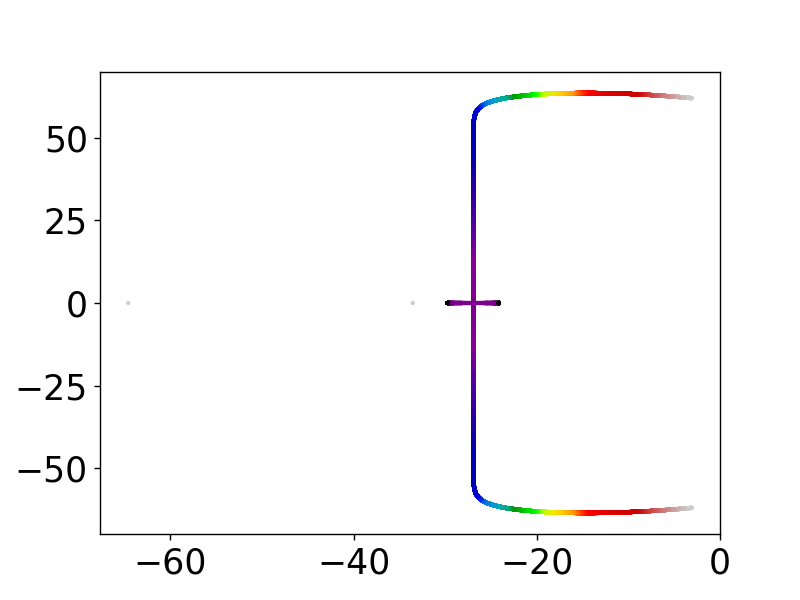

E*=0.0045, I*=0.0703: stable, with nonzero imaginary components


<IPython.core.display.Javascript object>


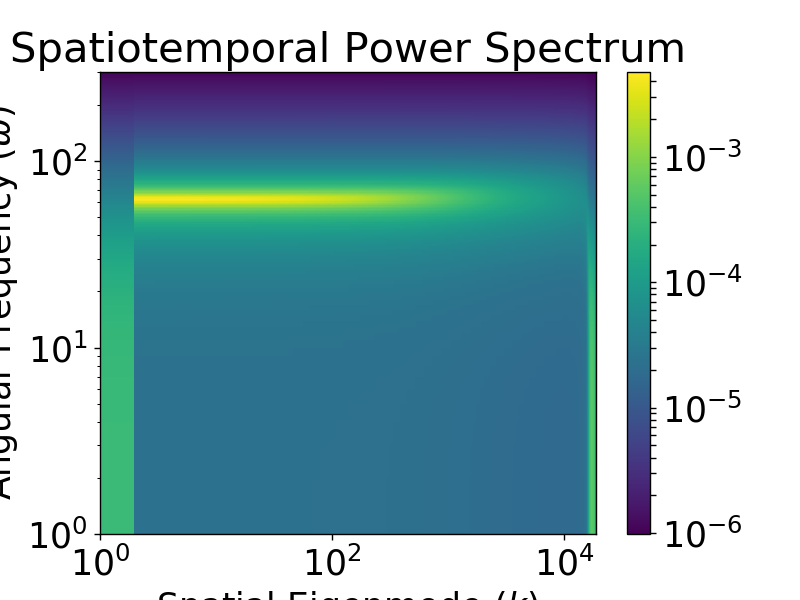

In [48]:
#re-analyze result of minimization procedure
#better_result=np.load('decent_spatiotemporal_spectrum.npy')[()]

#better_result=np.load('decent_spatiotemporal_spectrum_lower_gauss.npy')[()]

#better_result=np.load('decent_spatiotemporal_spectrum_even_lower_gauss.npy')[()]

#better_result=np.load('decent_spatiotemporal_spectrum_lowest_gauss.npy')[()]

#thesis parameters
#better_result=dict(x=np.array([1.15357519e+02, 1.80816514e+02, 1.89765888e+02, 2.10306805e+02,
#       1.43682388e+01, 1.09130331e+00, 5.36635639e+00, 5.31252166e+00,
#       8.37626732e+00, 2.74681544e+00, 3.66503548e-02, 1.00910684e+02,
#       4.95497870e+00, 4.47579295e+00]))


SStates, success = H_Simple_Steady_State(alpha_EE=better_result['x'][0], alpha_IE=better_result['x'][1], alpha_EI=better_result['x'][2], alpha_II=better_result['x'][3], 
                                         d_e=better_result['x'][4], d_i=better_result['x'][5], P=better_result['x'][6], Q=better_result['x'][7])
print(SStates)       

SSnr=0

SStype, found_suitable, JacEigs = GraphWC_Jacobian_TrDet(Laplacian_eigenvalues=eigenvalues, Graph_Kernel='Gaussian', Ess=SStates[0,SSnr], Iss=SStates[1,SSnr],
                                     alpha_EE=better_result['x'][0], alpha_IE=better_result['x'][1], alpha_EI=better_result['x'][2], alpha_II=better_result['x'][3], d_e=better_result['x'][4], d_i=better_result['x'][5], 
                                     sigma_EE=better_result['x'][8], sigma_IE=better_result['x'][9], sigma_EI=better_result['x'][10], sigma_II=better_result['x'][11],  
                                     D=1, tau_e=better_result['x'][12], tau_i=better_result['x'][13], Visual=True)    


Spectrum = Graph_WC_Spatiotemporal_PowerSpectrum(Laplacian_eigenvalues=eigenvalues, Graph_Kernel='Gaussian', Ess=SStates[0,SSnr], Iss=SStates[1,SSnr],
                                        alpha_EE=better_result['x'][0], alpha_IE=better_result['x'][1], alpha_EI=better_result['x'][2], alpha_II=better_result['x'][3], d_e=better_result['x'][4], d_i=better_result['x'][5], 
                                        sigma_EE=better_result['x'][8], sigma_IE=better_result['x'][9], sigma_EI=better_result['x'][10], sigma_II=better_result['x'][11],  
                                        D=1, tau_e=better_result['x'][12], tau_i=better_result['x'][13],
                                        sigma_noise_e=1, sigma_noise_i=1,
                                        max_omega=Max_omega, delta_omega=Delta_omega,
                                        Spatial_Spectrum_Only=False, Visual=True)


#FC=Functional_Connectivity(eigenvectors2, np.sum(Spectrum,axis=0), one_dim=False, Visual=False)


<IPython.core.display.Javascript object>


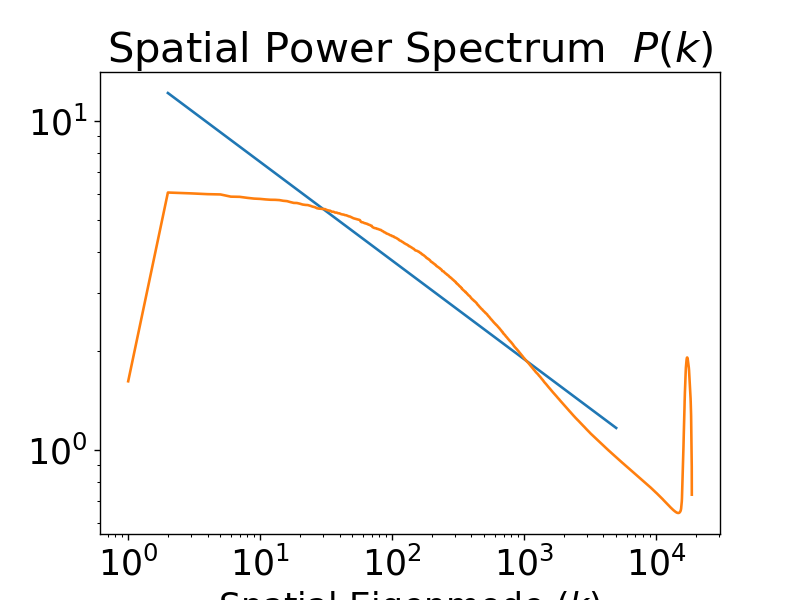

420.7039518731307
20.434239752168175


<IPython.core.display.Javascript object>


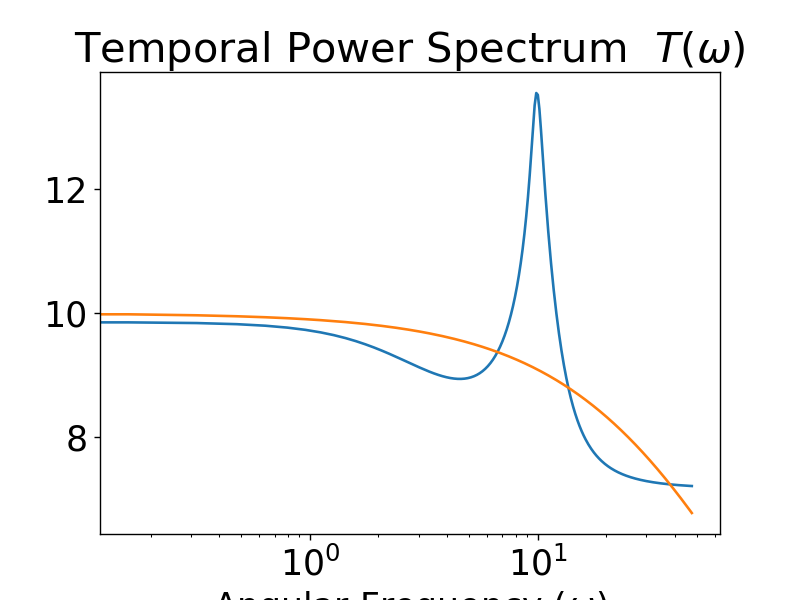

7.170417444609151
16.548255926802618


In [49]:
Gk=Delta_omega*np.sum(Spectrum,axis=0)/np.pi
Gw=2*np.sum(Spectrum,axis=1)
plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Spatial Power Spectrum  $P(k)$")
ax.set_xlabel("Spatial Eigenmode ($k$)")
true_SPS=True_Spatial_Spectrum
scale_factor_spatial=np.dot(true_SPS,Gk[first_k:5000])/(np.linalg.norm(Gk[first_k:5000], ord=2))**2
print(scale_factor_spatial)
this_spatial_distance=np.linalg.norm(true_SPS-scale_factor_spatial*Gk[first_k:5000], ord=2)
print(this_spatial_distance)

ax.loglog(np.arange(first_k, 5000), true_SPS)
ax.loglog(np.arange(1,len(eigenvalues)+1), Gk*scale_factor_spatial)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title("Temporal Power Spectrum  $T(\omega)$")
ax.set_xlabel("Angular Frequency ($\omega$)")

freqs=np.arange(0,Max_omega,Delta_omega)/(2*np.pi)
#original height 5 size 0.9
true_TPS= True_Temporal_Spectrum  #10*(1/(0.1*freqs+0.4)+0.7*np.exp((-(freqs-10)**2)/(2*0.9**2))+0.3*np.exp((-(freqs-22)**2)/(2*3**2)))
scale_factor_temporal=np.mean(true_TPS-Gw)#np.dot(true_TPS,Gw)/(np.linalg.norm(Gw, ord=2))**2#np.mean(true_TPS-Gw)
print(scale_factor_temporal)
this_temporal_distance=np.linalg.norm(true_TPS-scale_factor_temporal-Gw, ord=2)
print(this_temporal_distance)

ax.semilogx(np.arange(0,Max_omega,Delta_omega)/(2*np.pi), Gw+scale_factor_temporal)
ax.semilogx(np.arange(0,Max_omega,Delta_omega)/(2*np.pi), true_TPS)

#np.save('decent_spatiotemporal_spectrum.npy', better_result)
#print(better_result)

In [65]:
#np.load('decent_spatiotemporal_spectrum_lower_gauss.npy')[()]['x']-better_result['x']

#np.save('decent_spatiotemporal_spectrum_lowest_gauss.npy', better_result)

In [ ]:
#comparison of numerical (nonlinear) simulations and (linearized) semi analytic results 
#(any parameter set; grid laplacian only):
#
#1) test for steady state calculation: simulate (with no noise) on a grid, start directly from SS solution.
#2) test for stability/instability/oscillations: add noise in the grid simulation for specific parameter sets
#3) test for power spectrum calculation: run noisy grid simulation and compare prediction with measured PS (see handwritten notes)
#
################################################################################################
#testing the correctness of the parameter fit procedure(full analysis + minimization algorithm) result
#(intended mainly for the better_result parameter set)
#
#retest minimization algorithm, with objective the current best-fit PS obtained and random initial condition. see if other parameter combinations give the same, ideally converge to same par. set
#
#check (via effect on linearized Jk eigenvalues) if a nearby hopf bifurcation can be induced by changing P or some other parameter 
#(to ask rikkert: do we want this as a prior requirement in minimization? would be hard but doable)
#

<IPython.core.display.Javascript object>


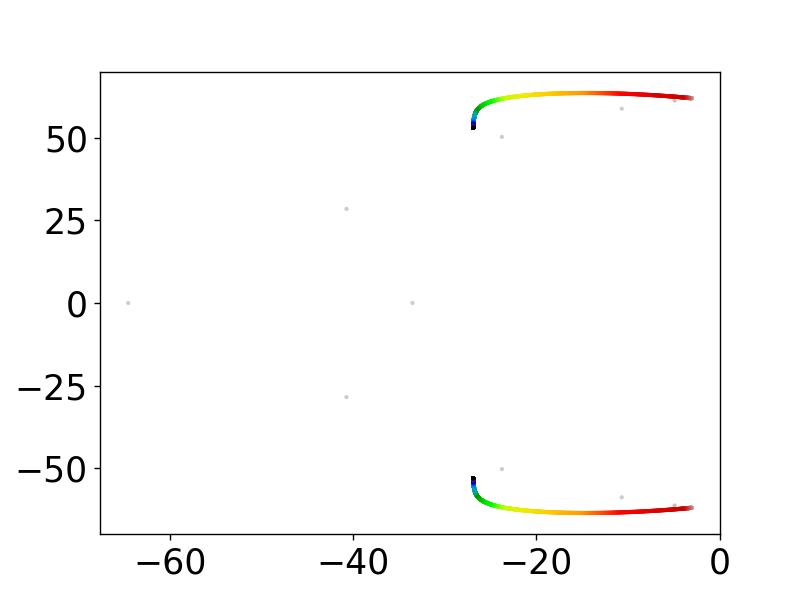

E*=0.0045, I*=0.0703: stable, with nonzero imaginary components


<IPython.core.display.Javascript object>


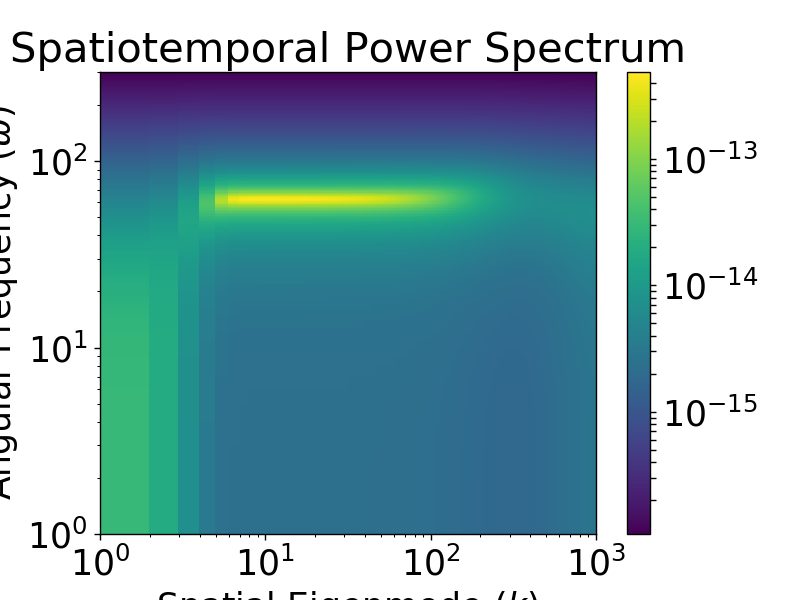

In [72]:
#1D predictions
#set up 1D-specific simulation parameters and WCM propagators
one_dim=False
syn=0
#if making plot from connectome minimization, need to change this value to the number of connectome nodes
gridsize=1000#len(eigenvalues)
h=1
max_omega=Max_omega
delta_omega=Delta_omega

Graph_Kernel='Gaussian'
one_dim_eigenvalues, one_dim_eigenvectors = one_dim_Laplacian_eigenvalues(gridsize, h, syn, vecs=True)
#one_dim_eigenvalues2 = one_dim_Laplacian_eigenvalues(gridsize, h, syn)

#re-analyze result of minimization procedure
#better_result=np.load('decent_spatiotemporal_spectrum.npy')[()]

#better_result=np.load('decent_spatiotemporal_spectrum_lower_gauss.npy')[()]

#better_result=np.load('decent_spatiotemporal_spectrum_even_lower_gauss.npy')[()]

#better_result=np.load('decent_spatiotemporal_spectrum_lowest_gauss.npy')[()]

#better_result=dict(x=np.array([1.15357519e+02, 1.80816514e+02, 1.89765888e+02, 2.10306805e+02,
#       1.43682388e+01, 1.09130331e+00, 5.36635639e+00, 5.31252166e+00,
#       8.37626732e+00, 2.74681544e+00, 3.66503548e-02, 1.00910684e+02,
#       4.95497870e+00, 4.47579295e+00]))

aEE=better_result['x'][0]
aIE=better_result['x'][1]
aEI=better_result['x'][2]
aII=better_result['x'][3]
dE=better_result['x'][4]
dI=better_result['x'][5]
P=better_result['x'][6]
Q=better_result['x'][7]
sEE=better_result['x'][8]
sIE=better_result['x'][9]
sEI=better_result['x'][10]
sII=better_result['x'][11]
D=1
tE=better_result['x'][12]
tI=better_result['x'][13]
snE=0.00001
#snE=0.0001
snI=snE

#given parameters, calculate steady states
steady_states, success = H_Simple_Steady_State(aEE, aIE, aEI, aII, dE, dI, P, Q)


#for each steady state, compute linear stability and power spectrum
if success==True:
    nrSS=len(steady_states[0])
    allG = np.empty((nrSS,int(max_omega/delta_omega),gridsize), dtype=float)
    SStypes=np.zeros(nrSS)
    for ss in range(nrSS):

        Ess = steady_states[0,ss]
        Iss = steady_states[1,ss]

        SStypes[ss], found_suitable, JacEigs = GraphWC_Jacobian_TrDet(one_dim_eigenvalues, Graph_Kernel, Ess, Iss,
                                         alpha_EE=aEE, alpha_IE=aIE, alpha_EI=aEI, alpha_II=aII, d_e=dE, d_i=dI,
                                         sigma_EE=sEE, sigma_IE=sIE, sigma_EI=sEI, sigma_II=sII, D=D, 
                                         tau_e=tE, tau_i=tI, Visual=True) 

        #allG[ss,:,:] = 
        allG[ss,:,:] =Graph_WC_Spatiotemporal_PowerSpectrum(one_dim_eigenvalues, Graph_Kernel, Ess, Iss,
                                                aEE, aIE, aEI, aII, dE, dI,
                                                 sEE, sIE, sEI, sII, D, 
                                                 tE, tI,
                                                 snE, snI, 
                                                  max_omega, delta_omega,          
                                                   Spatial_Spectrum_Only=False, Visual=True)
        
        #Func_Conn_prediction = Functional_Connectivity(one_dim_eigenvectors,np.sum(allG[ss,:,:], axis=0), one_dim=True, Visual=True)
        

        

<IPython.core.display.Javascript object>


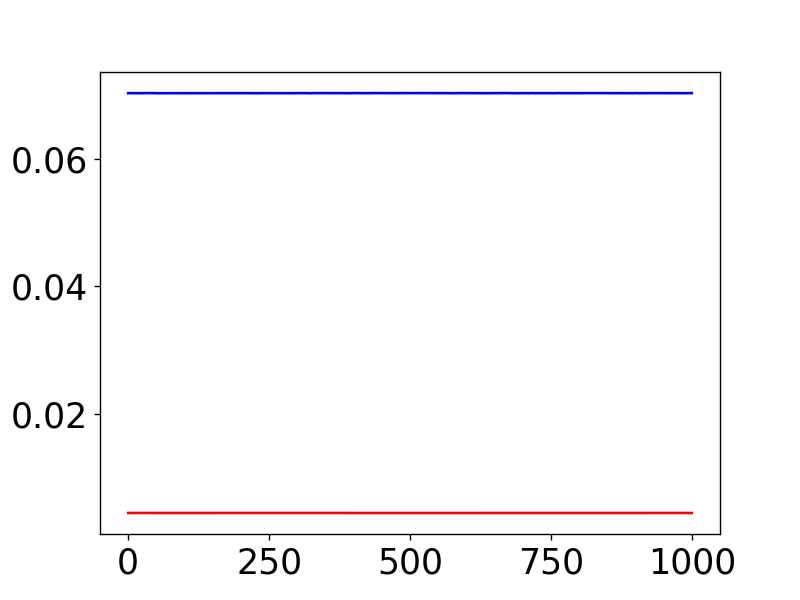

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

In [57]:
#1D grid simulation (nonlinear wilson-cowan)
nrSS=0
gridsize=1000
Time=1
Delta_t=0.0001
Ess = steady_states[0,nrSS]
Iss = steady_states[1,nrSS]    


E_total= Graph_Wilson_Cowan_Model(Ess, Iss, Time, Delta_t,                          
                         aEE, aIE, aEI, aII,
                         sEE, sIE, sEI, sII, D,
                         dE, dI, P, Q, tE, tI, snE, snI, 
                         Graph_Kernel=Graph_Kernel, one_dim=True, syn=syn, gridsize=gridsize, h=h,
                         eigvals=None, eigvecs=None,
                         Visual=True, SaveActivity=False, Filepath=' ')   


Simulation SPS obtained.
Simulation TPS obtained.
All simulation activity measures completed.
Obtaining analytic predictions...


<IPython.core.display.Javascript object>


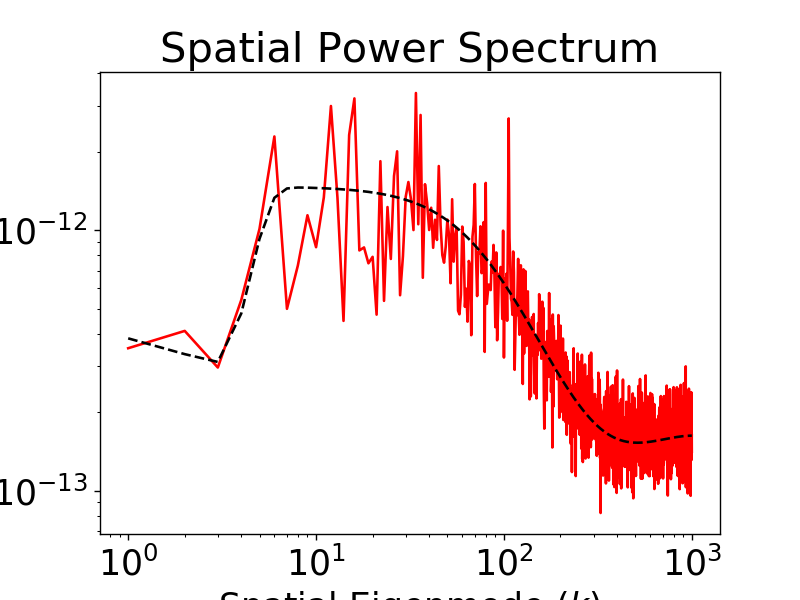

<IPython.core.display.Javascript object>


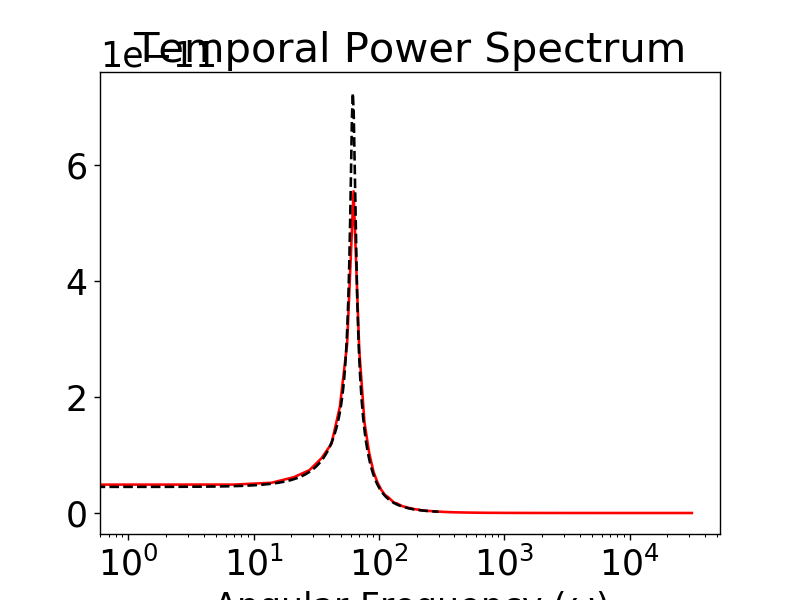

<IPython.core.display.Javascript object>


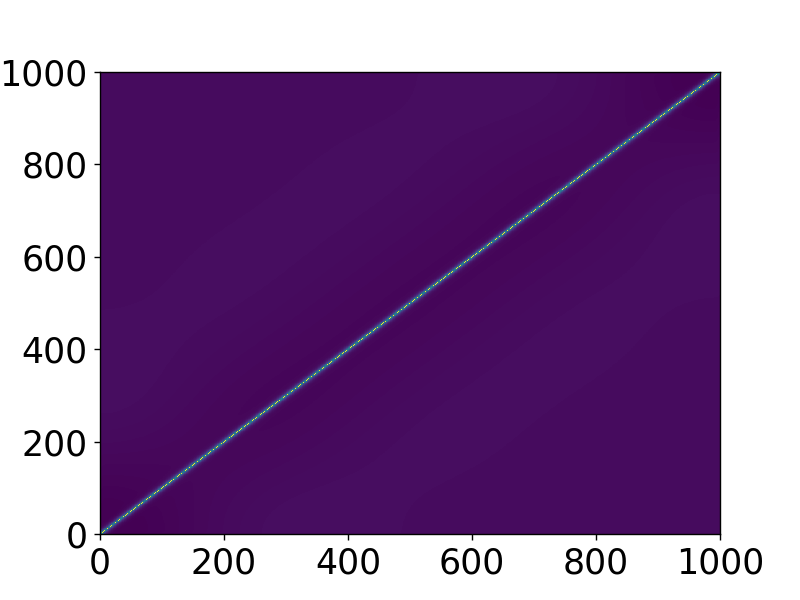

<IPython.core.display.Javascript object>


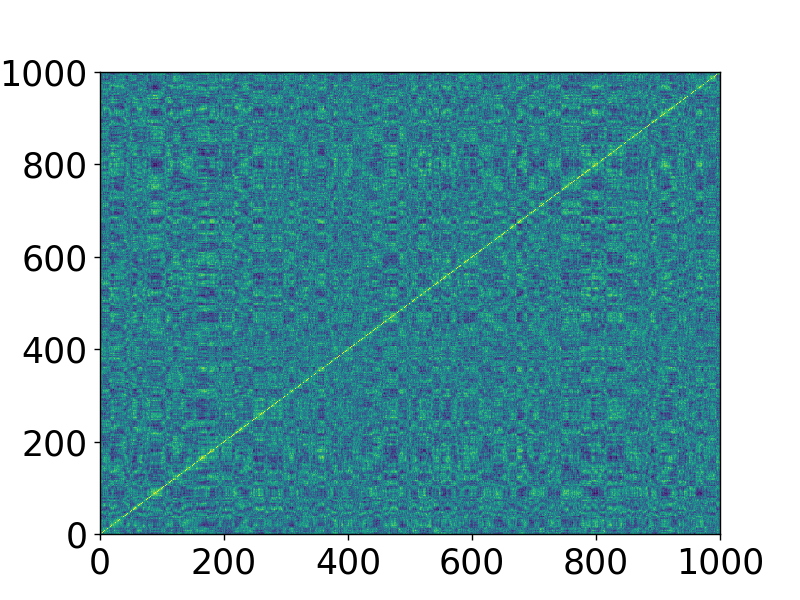

In [58]:
#activity analysis and comparison with prediction (1D)

#numerically calculated SS for current best spatiotemporal spectrum
#numerical_Ess = 0.008475747358027145
#numerical_Iss = 0.13448382710648957

#numerical_Ess = 0.009827630136763982
#numerical_Iss = 0.139242215636916

PS,TPS,FC=Activity_Analysis(Ess, Iss, Delta_t, beta=False, E_total=E_total, beta_E_total=None, alpha_EE=aEE, alpha_IE=aIE, alpha_EI=aEI, alpha_II=aII,
                         sigma_EE=sEE, sigma_IE=sIE, sigma_EI=sEI, sigma_II=sII, D=D,
                         d_e=dE, d_i=dI, P=P, Q=Q, tau_e=tE, tau_i=tI, sigma_noise_e=snE, sigma_noise_i=snI, 
                         Graph_Kernel=Graph_Kernel, prediction=True, max_omega=Max_omega, delta_omega=Delta_omega,
                        
                         one_dim=True, syn=syn, gridsize=gridsize, h=h, eigvals=None, eigvecs=None, Visual=True, Save_Results=False, Filepath=' ')


In [80]:
#Human connectome simulation (linearized wilson-cowan)
nrSS=0
#gridsize=1000
Time=1
Delta_t=0.0001
Ess = steady_states[0,nrSS]
Iss = steady_states[1,nrSS]  



Beta_E_total = Linearized_GLDomain_Wilson_Cowan_Model(Ess, Iss, Time, Delta_t,                          
                         aEE, aIE, aEI, aII,
                         sEE, sIE, sEI, sII, D,
                         dE, dI, P, Q, tE, tI, snE, snI, 
                         Graph_Kernel=Graph_Kernel, one_dim=False, syn=syn, gridsize=gridsize, h=h,
                         eigvals=eigenvalues,
                         Visual=True, SaveActivity=False, Filepath=' ') 



0
0.004534105412866495
0.07025683186725284
10
0.004266619633762692
0.06605113937839746
20
0.004015252191672363
0.06209967837739481
30
0.003779096437571881
0.05838739972939918
40
0.0035571489178763656
0.054898510788732376
50
0.0033485279132070564
0.051624151058611775
60
0.0031522625231165855
0.04854650987296399
70
0.002967597117133526
0.045656580913207734
80
0.0027942077628958875
0.042940147490071516
90
0.0026311230252819527
0.040386926385038796
100
0.0024779295953687337
0.037986934572411736
110
0.0023337317025856567
0.03573311616045366
120
0.002198277171620647
0.033615883351373374
130
0.002070815031585639
0.0316257132456659
140
0.0019509898777016954
0.029754761651618222
150
0.0018384700516549815
0.027998542704992548
160
0.0017324303934225383
0.02634783942349292
170
0.0016328921996261864
0.024795776199291054
180
0.0015390021206860755
0.02333796858359665
190
0.0014508713198727228
0.02196717153666177
200
0.0013677832117129475
0.02067889055443709
210
0.001289634284111133
0.0194678174801743

1700
1.5875485158651802e-06
1.6650471000922778e-05
1710
1.6735610981043975e-06
1.7660058870236184e-05
1720
1.5797507342561782e-06
1.718085130333804e-05
1730
1.4907215605650464e-06
1.6156722085541797e-05
1740
1.3886243515711504e-06
1.5993768567575028e-05
1750
1.413160794319857e-06
1.5071165664119308e-05
1760
1.1950582745340755e-06
1.527441406206837e-05
1770
1.0305769819941977e-06
1.5844237475440624e-05
1780
1.014084325074806e-06
1.4540018769026738e-05
1790
9.841806545380543e-07
1.186833371085841e-05
1800
9.9325732930776e-07
1.1769476343447692e-05
1810
9.312733277250866e-07
1.1727507199069981e-05
1820
9.58817509326788e-07
1.0126900064827065e-05
1830
9.314598802682082e-07
9.846738481742429e-06
1840
1.0195539399550439e-06
9.138399827110632e-06
1850
1.073349685423311e-06
7.927572015902773e-06
1860
1.0524716710046938e-06
8.192116530029004e-06
1870
1.0077911083246868e-06
9.789198722980714e-06
1880
1.0176518113018817e-06
9.568126567333226e-06
1890
1.001174363640036e-06
8.652431446430346e-06
19

3320
-3.7658658235178374e-07
-6.809845970221843e-07
3330
-4.998052883969681e-07
-4.079272766776432e-06
3340
-5.138509970372509e-07
-2.9293716867478596e-06
3350
-3.9747465776219876e-07
-4.230532927662199e-06
3360
-3.4152811177885314e-07
-3.8381060173379575e-06
3370
-4.765635248097017e-07
-5.069620980218216e-06
3380
-3.969788183110458e-07
-6.230373379147467e-06
3390
-4.989626384645541e-07
-5.192798563836325e-06
3400
-4.962480803227881e-07
-4.048811239152549e-06
3410
-4.610885434530054e-07
-3.584350950638021e-06
3420
-4.1284047597464107e-07
-2.729086111392144e-06
3430
-3.2553065242695073e-07
-2.5611170863647835e-06
3440
-2.508113167612874e-07
-1.5662050377047393e-06
3450
-2.0743585982349123e-07
9.328012999463579e-08
3460
-2.189479579785854e-07
1.1243382990721906e-07
3470
-3.2111734750395794e-07
-1.1845157501792703e-06
3480
-3.903241233745595e-07
-1.3045240772887581e-06
3490
-3.71455696050962e-07
-1.6091446631740791e-06
3500
-4.518468757426385e-07
-1.4359540711606144e-06
3510
-3.4177212769

4940
-4.297708025918939e-07
-5.659018888623239e-06
4950
-3.135118995142717e-07
-5.036218580279097e-06
4960
-2.919635112594361e-07
-4.978548289625613e-06
4970
-2.1092131161615742e-07
-5.601034074976931e-06
4980
-1.1247068557062894e-07
-3.972501077319992e-06
4990
-8.722016330460286e-08
-2.57208898259831e-06
5000
-9.779724758371409e-08
-2.292467078938945e-06
5010
5.243272549731185e-08
-5.103375108053005e-07
5020
4.8552369925375195e-08
-1.4037058037227423e-06
5030
1.8670776611398237e-07
-2.72580538044839e-06
5040
3.141725470091667e-07
-1.0703558730251716e-06
5050
3.517595295933776e-07
-2.1338926187244776e-06
5060
3.353386140842819e-07
-7.885821884074739e-07
5070
1.6075270028047374e-07
-2.2527638192347886e-06
5080
2.5902673817329154e-07
-7.612954930516579e-08
5090
2.7292045630066546e-07
-1.2519854071075043e-06
5100
3.928661482903422e-07
-6.398946375448999e-07
5110
3.9203612818848695e-07
-4.043546157790155e-07
5120
4.868115552262348e-07
-4.602581064912065e-07
5130
3.788740707879705e-07
1.509

6600
5.672273723588616e-07
7.398844721587962e-06
6610
5.975502264041394e-07
7.997322163256802e-06
6620
5.772696581579675e-07
6.3487621321386995e-06
6630
3.589553909417008e-07
5.117421104964253e-06
6640
4.0625723803985457e-07
5.096174580279366e-06
6650
3.006986635687421e-07
6.312729804989193e-06
6660
2.3112092016443786e-07
5.76256411705469e-06
6670
3.029758281914275e-07
3.58970396195865e-06
6680
2.2612850875326774e-07
4.433090118891543e-06
6690
1.4051806247639052e-07
3.3726528596944744e-06
6700
9.92498153502491e-08
3.6091289253462185e-06
6710
-1.7199871578222062e-08
3.879122700736863e-06
6720
-1.5200337195843976e-07
2.563432316227189e-06
6730
-1.5575841488234904e-07
1.4624960405214805e-06
6740
-1.2535673001133595e-07
1.4932481955031632e-06
6750
-1.0210011010320277e-07
1.5165415420964507e-06
6760
-1.0885704517308905e-07
2.2645501588553895e-06
6770
-2.3536075651455023e-07
1.9598702041645755e-06
6780
-9.764758222208393e-08
2.578172538634027e-06
6790
-1.447726191008767e-07
2.461717324989090

8250
-2.440409300400612e-07
-2.351807834302589e-06
8260
-3.1141922366695163e-07
-3.8987616780546505e-06
8270
-3.1472957499583996e-07
-4.696406789807637e-06
8280
-3.982671158053567e-07
-4.571950863052622e-06
8290
-5.20864922292998e-07
-4.785983528149645e-06
8300
-5.782250730205473e-07
-4.190895802543447e-06
8310
-7.246286615377163e-07
-2.6890993877629495e-06
8320
-6.011877932307928e-07
-4.508297729147798e-06
8330
-6.201050388568694e-07
-5.343769141330551e-06
8340
-9.299420375402597e-07
-4.616821059187517e-06
8350
-8.455371593050683e-07
-3.5242731537691353e-06
8360
-8.07830276072725e-07
-4.102060350066633e-06
8370
-9.393587413386864e-07
-6.0713365851095635e-06
8380
-9.296212863418613e-07
-6.687553934474162e-06
8390
-9.76972649798064e-07
-7.877289243131815e-06
8400
-8.722569358097696e-07
-8.792428110921735e-06
8410
-6.447050674423306e-07
-8.125356583982515e-06
8420
-7.877691035032767e-07
-8.3591133801133e-06
8430
-8.181262774662175e-07
-9.810097106687723e-06
8440
-8.207329470825891e-07
-7

9860
1.1476059741043948e-06
-2.5924043466984427e-07
9870
1.1275108521332633e-06
-4.0640834223393183e-07
9880
1.1998343316238504e-06
9.509794722530967e-07
9890
1.225502538433783e-06
2.520350854119659e-06
9900
1.0710128288300065e-06
3.1457618867961144e-06
9910
8.644705127723803e-07
1.265454713071722e-06
9920
9.101110681685907e-07
1.3364899753114273e-06
9930
1.0394960520511746e-06
2.1547144789393897e-06
9940
1.147031634154949e-06
3.23471321281767e-06
9950
1.1914681763562213e-06
4.968725868362888e-06
9960
1.201937566641953e-06
7.227822661932401e-06
9970
1.1493203847071279e-06
5.720042308996685e-06
9980
1.261209144263207e-06
6.5656114793922695e-06
9990
1.081647695628992e-06
8.188154782734495e-06


In [3]:
#Beta_E_total=np.load('G:/Macbook Stuff/Simulation Results/Decent spatiotemporal spectrum activity.npy')
#del Beta_E_total
#del eigenvectors
#del connectome_activity
#np.save('G:/Macbook Stuff/Simulation Results/Decent spatiotemporal spectrum activity.npy', Beta_E_total)

In [14]:
#print(len(Beta_E_total[0]))
#print(Beta_E_total[0])

19000
[-0.03948097 -0.03944229 -0.03940366 ... -0.03058519 -0.03058519
 -0.0305852 ]


In [ ]:
with h5py.File("G:/Macbook Stuff/Simulation Results/Decent spatiotemporal spectrum activity.h5") as hf:
    if "Activity" not in list(hf.keys()):
        #connectome_activity=np.dot(eigenvectors,Beta_E_total)
        hf.create_dataset("Activity",  data=connectome_activity)
    else:
        print("Warning: overwriting results of a previous simulation.") 

Simulation SPS obtained.
Simulation TPS obtained.
All simulation activity measures completed.
Obtaining analytic predictions...


<IPython.core.display.Javascript object>


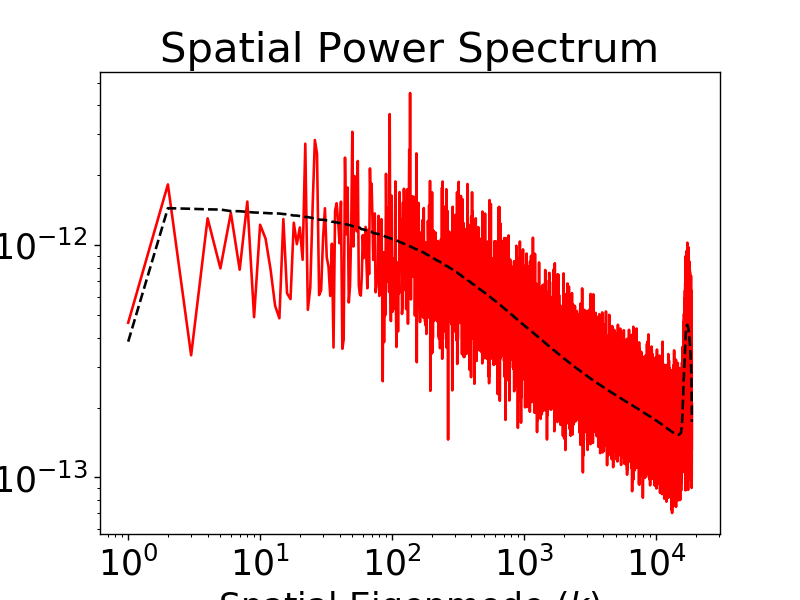

<IPython.core.display.Javascript object>


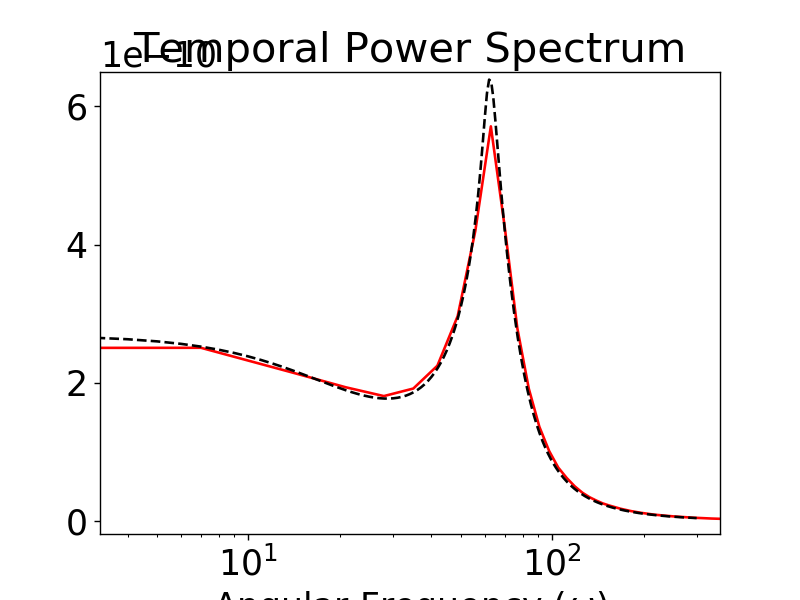

In [85]:
#activity analysis of linearized model and comparison with prediction (connectome)

PS_full,TPS_full=Activity_Analysis(Ess, Iss, Delta_t, beta=True, E_total=None, beta_E_total=Beta_E_total, alpha_EE=aEE, alpha_IE=aIE, alpha_EI=aEI, alpha_II=aII,
                         sigma_EE=sEE, sigma_IE=sIE, sigma_EI=sEI, sigma_II=sII, D=D,
                         d_e=dE, d_i=dI, P=P, Q=Q, tau_e=tE, tau_i=tI, sigma_noise_e=snE, sigma_noise_i=snI, 
                         Graph_Kernel=Graph_Kernel, prediction=True, max_omega=Max_omega, delta_omega=Delta_omega,
                         one_dim=False, syn=syn, gridsize=gridsize, h=h, eigvals=eigenvalues, Visual=True, Save_Results=False, Filepath=' ')


<IPython.core.display.Javascript object>


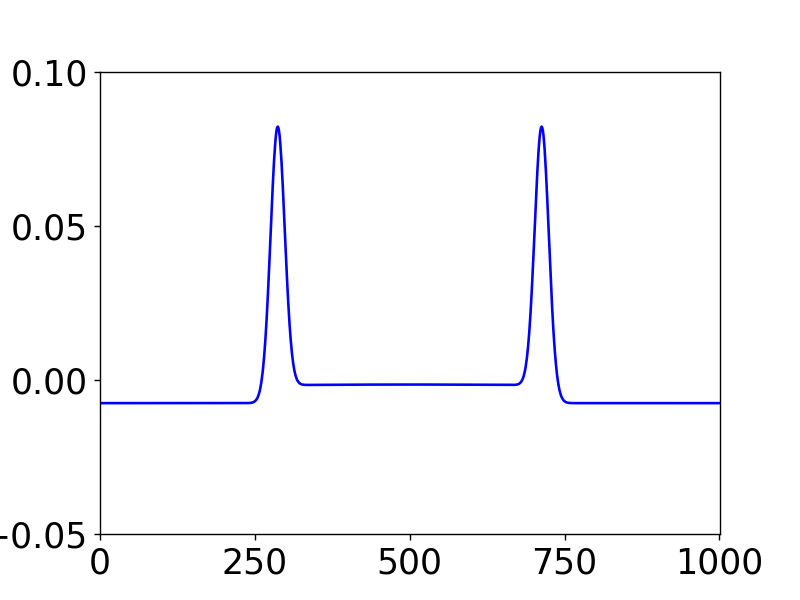

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495


In [57]:
#propagator test 1
#damped wave/telegrapher parameters
#params for first working tests: a=0.3, b=0.001, c=0, Delta_t=1
#make a smaller: wave travels faster
a=0.3
#make b larger: more diffusion
b=0.1
#nonzero c: switch from damped wave to telegrapher eqn
c=0

gridsize=1001
syn=0
h=3
u_0=0.3*sp.signal.gaussian(gridsize, 10)#np.zeros(gridsize)#(-0.1/499**2)*(np.arange(gridsize)-499)**2 + 0.1 
Delta_t=1
Time=500
#u_0[499]=1
u_final=graph_propagator_test(u_0, Time, Delta_t, kernel_param=Delta_t, Graph_Kernel='Damped Wave', a=a, b=b, c=c, sigma_noise=0.0,
                          one_dim=True, syn=syn, gridsize=gridsize,  h=h, eigvals=None, eigvecs=None,                         
                          Visual=True, SaveActivity=False, Filepath=' ', NSim=0)

<IPython.core.display.Javascript object>


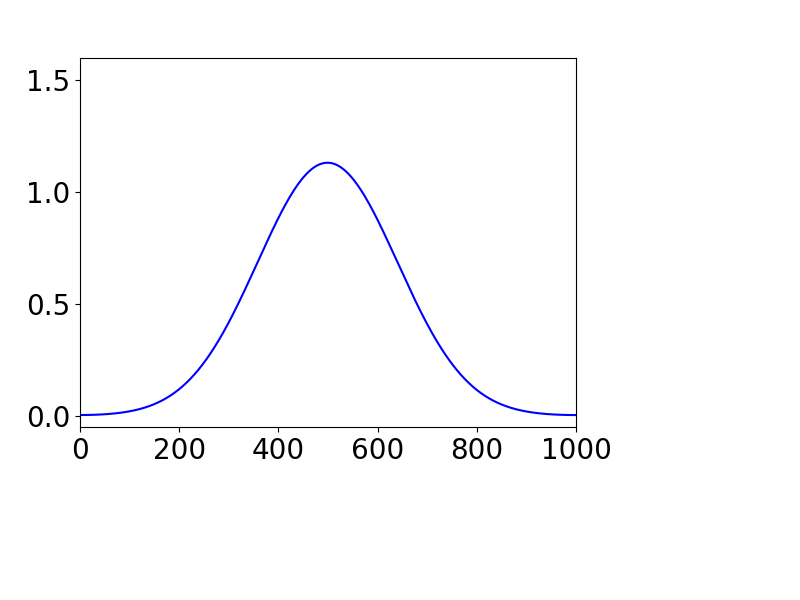

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
805
810
815
820
825
830
835
840
845
850
855
860
865
870
875
880
885
890
895
900
905
910
915
920
925
930
935
940
945
950
955
960
965
970
975
980
985
990
995
1000


KeyboardInterrupt: 

In [87]:
#propagator test 2
gridsize=1000
syn=0
h=0.01
u_0=np.zeros(gridsize)#(-0.1/499**2)*(np.arange(gridsize)-499)**2 + 0.1 
Delta_t=0.001
Time=100
u_0[499]=400
u_final=graph_propagator_test(u_0, Time, Delta_t, kernel_param=Delta_t, Graph_Kernel='Gaussian', sigma_noise=0,
                          one_dim=True, syn=syn, gridsize=gridsize,  h=h, eigvals=None, eigvecs=None,                         
                          Visual=True, SaveActivity=False, Filepath=' ', NSim=0)

In [5]:
#propagator test 3: cortical mesh
#damped wave/telegrapher parameters
#params for first working tests: a=0.3, b=0.001, c=0, Delta_t=1
#make a smaller: wave travels faster
a=0.3
#make b larger: more diffusion
b=0.005
#nonzero c: switch from damped wave to telegrapher eqn
c=0

u_0=np.zeros(len(eigenvalues))#np.zeros(gridsize)#(-0.1/499**2)*(np.arange(gridsize)-499)**2 + 0.1 
Delta_t=1
Time=1000
u_0[6369]=50
u_0=graph_propagator_test(u_0, Time=50, Delta_t=50, kernel_param=50, Graph_Kernel='Gaussian', sigma_noise=0.0,
                          one_dim=False, syn=0, gridsize=0,  h=0, eigvals=eigenvalues, eigvecs=eigenvectors,                         
                          Visual=False, SaveActivity=False, Filepath=' ', NSim=0)
u_final=graph_propagator_test(u_0, Time, Delta_t, kernel_param=Delta_t, Graph_Kernel='Damped Wave', a=a, b=b, c=c, sigma_noise=0.0,
                          one_dim=False, syn=0, gridsize=0,  h=0, eigvals=eigenvalues, eigvecs=eigenvectors,                         
                          Visual=False, SaveActivity=True, Filepath=' ', NSim=0)

0
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
805
810
815
820
825
830
835
840
845
850
855
860
865
870
875
880
885
890
895
900
905
910
915
920
925
930
935
940
945
950
955
960
965
970
975
980
985
990
995


In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
f = h5py.File('G:/Macbook Stuff/Downloads/NeuralFieldModelv2/100307_Laplace.mat', 'r')
CC = np.asarray(f['CC']['restInds'], dtype=int)
indices = np.array([elem[0] for elem in CC])-1
AllVet=np.asarray(f['vertices']['all'])
AllVet=AllVet[:,indices]

dist=np.sqrt(AllVet[0,:]**2 + AllVet[1,:]**2 + AllVet[2,:]**2)
trace4 = go.Scatter3d(
    x=AllVet[0,:],
    y=AllVet[1,:],
    z=AllVet[2,:],
    #alphahull=50
    mode='markers',
    marker=dict(
        size=5,
        color=dist,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1,
        #line=dict(color='rgba(0, 0, 0,0.5)',width=1,)
        )
    )
data = [trace3]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [39]:
with h5py.File('G:/Macbook Stuff/Simulation Results/Damped Wave Kernel Test t=1/0# Sim Activity b=0.005.h5', 'r') as file:
    print(list(file.keys()))
    DWave = np.asarray(file['Activity'], dtype=float)

DWave[:,0]

['Activity']


array([-0.00267165, -0.00267164, -0.00267096, ..., -0.00267156,
       -0.00267112, -0.00267113])

In [10]:
np.max(DWave[:,60])

0.05307993433932608

In [ ]:
import plotly.offline as offline
from plotly.graph_objs import *
#init_notebook_mode(connected=True)
offline.init_notebook_mode()

#mesh (or full connectome) graph edges
#trace1=Scatter3d(x=Xe,
#               y=Ye,
#               z=Ze,
#               mode='lines',
#              line=Line(color='rgba(0,0,0,1)', width=1),
#             )

#Mesh3d
trace2=Mesh3d(x=Xn,
               y=Yn,
               z=Zn,
              i=iN,
              j=jN,
              k=kN,
              text=np.arange(len(Xn)),
              intensity=connectome_activity[:,0],
             lighting = dict(ambient=0.8, diffuse=1, roughness = 0.4, specular=0, fresnel=0.2),
              cmin=-10E-9,#-0.1,
              cmax=10E-9#0.1
              #eigenvectors[:,1001]#
              
            #, lighting=dict(ambient=,
                        #diffuse=,
                 #specular=,
                 #roughness=,
                 #fresnel=)
              
          #     mode='markers',
          #  marker=dict(
          #          size=5,
          #          color=-AllVet[1,:],#np.sqrt(AllVet[2,:]**2+AllVet[0,:]**2+AllVet[1,:]**2),                # set color to an array/list of desired values
          #          colorscale='Viridis',   # choose a colorscale
          #          opacity=0.8,
          #          line=dict(color='rgba(0, 0, 0,0.5)',
          #                     width=1,
        #                     )
        #                )
                )



frames =[dict(data=[dict(type='mesh3d', intensity=connectome_activity[:,i])],
                  traces=[0],
                  name='frame{}'.format(i)) for i in range(16000,16300,6)] 




axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )
                 
layout = Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),  
    hovermode=False,     autosize=False,
    width=1000,
    height=700
)       
data=Data([trace2])

fig_frames = Figure(data=data, layout=layout, frames=frames)

fig_frames['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 250, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 120, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}], 
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': True,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

#fig=Figure(data=data, layout=layout)

offline.iplot(fig_frames, filename='Les-Miserables')

In [36]:
with h5py.File('G:/Macbook Stuff/Downloads/Fibers.mat', 'r') as file:
    print(list(file.keys()))
    print(list(file['fgCC'].keys()))
        
    Fibers=[file[element][:] for element in file['fgCC']['fibers'][0]]

fiber_edges=np.load('G:/Macbook Stuff/Downloads/NeuralFieldModelv2/fgCC_fiber_edges.npy')
f = h5py.File('G:/Macbook Stuff/Downloads/NeuralFieldModelv2/100307_Laplace.mat', 'r')
CC = np.asarray(f['CC']['restInds'], dtype=int)
f.close()
indices = np.array([elem[0] for elem in CC])-1
EX=[]
EY=[]
EZ=[]
colors=[]

counter=0
for i in range(0,len(Fibers),2):
    if fiber_edges[i,0] in indices and fiber_edges[i,1] in indices and fiber_edges[i,0]!=fiber_edges[i,1]:
        counter+=1
        for j in range(Fibers[i].shape[0]-1):
            EX+=[Fibers[i][j,0], Fibers[i][j+1,0], None]
            EY+=[Fibers[i][j,1], Fibers[i][j+1,1], None]
            EZ+=[Fibers[i][j,2], Fibers[i][j+1,2], None]

counter    


    

['#refs#', 'fg', 'fgCC', 'options', 'trackOpts']
['colorRgb', 'coordspace', 'fibers', 'name', 'params', 'query_id', 'seedRadius', 'seedVoxelOffsets', 'seeds', 'thickness', 'visible']


5933

In [ ]:
import plotly.offline as offline
from plotly.graph_objs import *
#init_notebook_mode(connected=True)
offline.init_notebook_mode()

trace3=Scatter3d(x=EX,
               y=EY,
               z=EZ,
               mode='lines',
               line=Line(color=EX,#'rgba(100,100,100,0.9)',#colors
                         #colorscale=[[0, 'rgb(0,0,255)'], [1, 'rgb(255,0,0)']],#'Rainbow',
                         width=1),
               )
axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )
                 
layout = Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
    hovermode=False
)       
data=Data([trace3])
fig=Figure(data=data, layout=layout)

offline.iplot(fig, filename='Les-Miserables-2')